(1) Python Package Install

In [5]:

!pip install nlpaug

     |████████████████████████████████| 405 kB 4.2 MB/s 


# (2) Python Package Imports

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import Markdown, clear_output
import os
import re
import string
from wordcloud import WordCloud,STOPWORDS
# from tqdm.auto import tqdm
from tqdm.notebook import tqdm
tqdm.pandas()
from pprint import pprint
import gc

random_state = 2021

import time
import html
import math
from collections import defaultdict
import string
import re
import unicodedata
import random

import gensim 

import spacy
nlp = spacy.load('en_core_web_sm')

import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.model.word_stats as nmw
import nlpaug.flow as nafc


from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('universal_tagset')
nltk.download('omw')

import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM,Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D, SpatialDropout1D,BatchNormalization,Activation, concatenate, Input, Lambda
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.initializers import Constant
import tensorflow.keras.backend
from tensorflow.keras.layers import InputLayer,Layer,Input
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.preprocessing import MinMaxScaler,StandardScaler,MaxAbsScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, StratifiedKFold
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning) 
random_state = 2021

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# (3) Import the processed file from the EDA and preprocessing step for model building

In [7]:
project_path = '/content/drive/MyDrive/Colab Notebooks/Captone_Project'
data_file = "processed_input.csv"

In [8]:
df_p = pd.read_csv(os.path.join(os.path.join(project_path,data_file)))
df_p.head()



,Short description,Description,Caller,Assignment group,combined_description,lang,trans_status,translated_text,post_lang,p_desc,Num_Words,isGRP_0,Pass_2_label,Assignment level,L1L2
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,en,True,login issue -verified user details.(employee# ...,en,login issue verified user detail employee mana...,24,1,NaN,L1L2,L1
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,en,True,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,en,outlook team meeting skype meeting rest appear...,12,1,NaN,L1L2,L1
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,en,True,cant log in to vpn \r\n\r\nreceived from: eylq...,en,log vpn log vpn,4,1,NaN,L1L2,L1
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,en,True,unable to access hr_tool page unable to access...,en,unable access hr tool page unable access hr to...,10,1,NaN,L1L2,L1
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,ja,True,skype error skype error,ja,skype error skype error,4,1,NaN,L1L2,L1


In [9]:
df_p.isna().sum()

Short description          0
Description                0
Caller                     0
Assignment group           0
combined_description       0
lang                       0
trans_status               0
translated_text            0
post_lang                  0
p_desc                     0
Num_Words                  0
isGRP_0                    0
Pass_2_label            3422
Assignment level           0
L1L2                    3830
dtype: int64

# (4) Create few SKlearn compatible Transformation Classes

In [10]:
### Create a Keras tokenizer class for fitting into the sklearn pipelines
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.pipeline import Pipeline, make_pipeline

class TokenizerTransformer(BaseEstimator, TransformerMixin, Tokenizer):

    def __init__(self, **tokenizer_params):
      Tokenizer.__init__(self, **tokenizer_params)

    def fit(self, X, y=None):
      self.fit_on_texts(X)
      return self

    def transform(self, X, y=None):
      X_transformed = self.texts_to_sequences(X)
      return X_transformed

    def fit_transform(self, X, y=None):
      self.fit(X)
      return self.transform(X)

In [11]:
class PaddingTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, maxlen):
      self.maxlen = maxlen

    def fit(self, X, y=None):
      return self

    def transform(self, X, y=None):
      X_padded = pad_sequences(X, maxlen=self.maxlen)
      return X_padded
    
    def fit_transform(self, X, y=None):
      self.fit(X)
      return self.transform(X)



In [12]:
class SynonymAugmenter(BaseEstimator):
    """
    This custom resampler is based on nlpaug based Synonym augmentation
    """
    
    def __init__(self,min_length=3,aug_p=0.6,aug_src='wordnet'):
      self.min_length = min_length
      self.aug_p = aug_p
      self.aug_src = aug_src
      self.sample_indices_ = [] ### track sampling indices
      # naw.SynonymAug.__init__(self,**nlpaug_params)

    def fit_resample(self, X, y):
        return self.resample(X, y)
        
    def resample(self, X, y):
        self.sample_indices_ = [] ### track sampling indices
        aug = naw.SynonymAug(aug_src=self.aug_src,aug_p=self.aug_p)
        group_counts = Counter(y)
        max_count = group_counts[max(group_counts, key=group_counts.get)]
        resampled_text, resampled_labels = X,y

        for groups_to_sample in group_counts.keys():

          group_indices = np.where(y == groups_to_sample)[0]
          self.sample_indices_.extend(group_indices)### track sampling indices
          counter = group_counts[groups_to_sample]
          while counter <= max_count-1:
            idx = group_indices[random.randint(0,len(group_indices)-1)]
            orig_text = X[idx]
            if len(orig_text.split()) > self.min_length:
              aug_text = aug.augment(orig_text)
              resampled_text = np.append(resampled_text,aug_text)
              resampled_labels = np.append(resampled_labels,groups_to_sample)
              self.sample_indices_.append(idx) ### track sampling indices
              counter += 1
            else:
              continue
        return resampled_text,resampled_labels

In [13]:
class TFIDFAugmentor(BaseEstimator):
    """
    This custom resampler is based on nlpaug based TFIDF augmentation
    """
    
    def __init__(self,min_length=3):
      self.min_length = min_length
      self.sample_indices_ = [] ### track sampling indices


    def _tokenizer(self, text, token_pattern=r"(?u)\b\w\w+\b"):
      token_pattern = re.compile(token_pattern)
      return token_pattern.findall(text)

        
    def fit_resample(self, X, y):
        return self.resample(X, y)
        
    def resample(self, X, y):
        self.sample_indices_ = [] ### track sampling indices
        group_counts = Counter(y)
        max_count = group_counts[max(group_counts, key=group_counts.get)]
        resampled_text, resampled_labels = X,y

        for groups_to_sample in group_counts.keys():
          group_indices = np.where(y == groups_to_sample)[0]
          self.sample_indices_.extend(group_indices)### track sampling indices
          train_x_tokens = [self._tokenizer(x) for x in X[group_indices]]
          tfidf_model = nmw.TfIdf()
          tfidf_model.train(train_x_tokens)
          tfidf_model.save('.')
          aug = naw.TfIdfAug(model_path='.', tokenizer=self._tokenizer)

          counter = group_counts[groups_to_sample]
          while counter <= max_count-1:
            idx = group_indices[random.randint(0,len(group_indices)-1)]
            orig_text = X[idx]
            if len(orig_text.split()) > self.min_length:
              aug_text = aug.augment(orig_text)
              resampled_text = np.append(resampled_text,aug_text)
              resampled_labels = np.append(resampled_labels,groups_to_sample)
              self.sample_indices_.append(idx) ### track sampling indices
              counter += 1
            else:
              continue
        return resampled_text,resampled_labels

In [14]:
 class LivePlot(tf.keras.callbacks.Callback):
    
    def __init__(self,refresh_rate=5,train_loss=None,train_metric=None,sup_title="Training Graph"):
        self.validation_prefix = "val_"
        self.refresh_rate = refresh_rate
        self.train_loss = train_loss
        self.val_loss = self.validation_prefix + train_loss
        self.train_metric = train_metric
        self.val_metric = self.validation_prefix + train_metric
        self.sup_title = sup_title
        
    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and metrics
        self.train_losses = []
        self.train_metrics = []
        self.val_losses = []
        self.val_metrics = []
        
        self.logs = []
    
    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        """
        Calculates and plots loss and metrics
        """
        # Extract from the log
        log_train_loss = logs.get(self.train_loss)
        log_train_metric = logs.get(self.train_metric)
        log_val_loss = logs.get(self.val_loss)
        log_val_metric = logs.get(self.val_metric)
        
        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.train_losses.append(log_train_loss)
        self.train_metrics.append(log_train_metric)
        self.val_losses.append(log_val_loss)
        self.val_metrics.append(log_val_metric)
        
        # Plots every nth epoch
        if epoch > 0 and epoch%self.refresh_rate == 0:
            fig, ax = plt.subplots(1,2,figsize=(20,6)) 
            clear_output(wait=True)
            N = np.arange(0, len(self.train_losses))
            
            sns.lineplot(x=N,y=self.train_losses,ax=ax[0],legend='brief',label=self.train_loss)
            sns.lineplot(x=N, y = self.val_losses,ax=ax[0],legend='brief',label=self.val_loss)
            ax[0].set_title('Loss over Epoch',{'fontsize':20})
            # ax[0].set_title(f'Loss over Epoch {epoch} - {log_train_loss:.3}/{log_val_loss:.3} - (T/V)\n',{'fontsize':20})
            ax[0].set_xlabel('Epochs')
            ax[0].set_ylabel(self.train_loss)
            
            sns.lineplot(x=N,y=self.train_metrics,ax=ax[1],legend='brief',label=self.train_metric)
            sns.lineplot(x=N,y=self.val_metrics,ax=ax[1],legend='brief',label=self.val_metric)
            ax[1].set_title('Performance over Epoch ',{'fontsize':20})
            # ax[1].set_title(f'Performance over Epoch {epoch} - {log_train_metric:.3}/{log_val_metric:.3} - (T/V) \n',{'fontsize':20})
            ax[1].set_xlabel('Epochs')
            ax[1].set_ylabel(self.train_metric)
            plt.suptitle(self.sup_title,y=1.1,fontsize=25)
            plt.show()

#(5) Create helper funtions for building and testing DL Models

In [22]:
####### Read Glove vectors from file and cache it ######
embeddings = {}
def read_vector_file(file_loc):
  global embeddings
  if embeddings == {}:
    print(" Glove vector file is not cached. Will take a while. Loading in progress....")
    for o in open(file_loc):
      word = o.split(' ')[0]
      embd = o.split(' ')[1:]
      embd = np.asarray(embd, dtype = 'float32')
      embeddings[word] = embd
  else:
    print(" Glove vector file is already cached. This will be quick. Loading in progress...")
  return embeddings

######## Create Glove embedding matrix ###############
def create_glove_embeddings(max_features,keras_token_obj,embedding_size=300):
  print(" Loading Glove file in progress ..........")
  embed_files  = os.path.join(project_path,'glove.6B.300d.txt')
  vocab = keras_token_obj.word_index
  num_words = min(len(vocab)+1,max_features)
  embedding_matrix = np.zeros((num_words,embedding_size))
  embd = read_vector_file(embed_files)
  # print(num_words,max_features,len(vocab))

  for word, i in keras_token_obj.word_index.items():
    if i < num_words:
      embedding_vector = embd.get(word)
      if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else:
      break
  # print(embedding_matrix.shape)
  print(" Loading Glove file completed ..........")
  return embedding_matrix

In [23]:
########## Create LDA based embeddings #############
from gensim import corpora, models
from sklearn.decomposition import LatentDirichletAllocation

def create_lda_embeddings(docs,max_features=10000,k_topics=300,ngram_range=(1,1),return_vocab = True):
  ##### Embedding Size for LDA is same as the number of topics
  print(" LDA Matrix creation in progress ..........")
  tfidf_vect = TfidfVectorizer(stop_words='english', max_features=max_features, ngram_range=ngram_range)
  tfidf_mat = tfidf_vect.fit_transform(docs)

  lda_model = LatentDirichletAllocation(n_components=k_topics, learning_method='online', random_state=random_state, verbose=0, n_jobs = -1)
  lda_matrix = lda_model.fit_transform(tfidf_mat)
  print(" LDA Matrix creation Completed ..........")

  if return_vocab:
    return lda_matrix,tfidf_vect.get_feature_names()
  else:
    return lda_matrix


In [24]:
def dl_model_master(df, text, label, caller,\
                    use_caller=True, test_size=0.2,\
                    embedding_type='default' ,embedding_size=300,max_features=10000,maxlen=100,\
                    over_sampler_obj=None,text_aug_obj=None,ngram_range=(1,3),\
                    call_back_list=['early_stop'], epochs=20, batch_size=50, validation_split=0.2,\
                    stratify=True, random_state=2021) :

  if stratify:
    stratify = df[label]
  else:
    stratify = None

  if use_caller:
    caller_enc = caller+"_enc"
    lbl_enc_caller = LabelEncoder()
    df[caller_enc] = lbl_enc_caller.fit_transform(df[caller])
    X_train,X_test,y_train,y_test = train_test_split(df[[text,caller_enc]],df[label],test_size=test_size,random_state=random_state,stratify=stratify)
    print(f"After Train Test split Train Shape: {X_train.shape}{y_train.shape} \nTest Shape: {X_test.shape}{y_test.shape}")

    X_train_caller = X_train[caller_enc].values
    X_train_text = X_train[text].values
    y_train = y_train.values
    X_test_text = X_test[text]
    X_test_caller = X_test[caller_enc].values
    y_test = y_test.values
    
  else:
    X_train,X_test,y_train,y_test = train_test_split(df[text],df[label],test_size=test_size,random_state=random_state,stratify=stratify)
    X_train_text = X_train[text].values
    X_test_text = X_test[text].values
    y_train = y_train.values
    y_test = y_test.values

  print(f"Train Shape: {X_train_text.shape}{X_train_caller.shape}{y_train.shape} \nTest Shape: {X_test_text.shape}{X_test_caller.shape}{y_test.shape}")

  ############## Text Augmentation #########################
  if text_aug_obj != None :
    over_sampler_obj = None
    print(f"Before Augment : {X_train_caller.shape}{X_train_text.shape}{y_train.shape}")
    X_train_text,y_train =  text_aug_obj.fit_resample(X_train_text,y_train)
    if use_caller:
      t_X_train_caller = []
      [t_X_train_caller.append(X_train_caller[indices]) for indices in tqdm(text_aug_obj.sample_indices_)]
      X_train_caller = np.array(t_X_train_caller)
    print(f"After Augment : {X_train_caller.shape}{X_train_text.shape}{y_train.shape}")
  ############## Text Augmentation #########################


  tfidf_vect = TfidfVectorizer(max_features=max_features,analyzer='word',stop_words='english',ngram_range=ngram_range)
  tfidf_train = tfidf_vect.fit_transform(X_train_text).toarray()
  tfidf_test = tfidf_vect.transform(X_test_text).toarray()

  idf_ip_shape = min(max_features, len(tfidf_vect.get_feature_names()))

  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(X_train_text)
  print(maxlen)

  sequences_train = tokenizer.texts_to_sequences(X_train_text)
  sequences_train = pad_sequences(sequences_train, maxlen=maxlen)

  sequences_test = tokenizer.texts_to_sequences(X_test_text)
  sequences_test =  pad_sequences(sequences_test, maxlen=maxlen)

  ############## OverSampler ######################### 
  if over_sampler_obj != None:
    print(f"Before OverSampling : {X_train_caller.shape}{sequences_train.shape}{y_train.shape}")
    if use_caller:
      # os_label = [str(i) + "%"+ str(j) for i,j in zip(y_train,X_train_caller)]
      sequences_train,y_train =  over_sampler_obj.fit_resample(sequences_train,y_train)
      t_X_train_caller = []
      [t_X_train_caller.append(X_train_caller[indices]) for indices in tqdm(over_sampler_obj.sample_indices_)]
      X_train_caller = np.array(t_X_train_caller)
      # y_train = np.asarray([lbls.split("%")[0]  for lbls in y_os])
      # X_train_caller = np.asarray([int(lbls.split("%")[1])  for lbls in y_os])
      t_tfidf_train = []
      [t_tfidf_train.append(tfidf_train[indices]) for indices in tqdm(over_sampler_obj.sample_indices_)]
      tfidf_train = np.array(t_tfidf_train)
    else:
      sequences_train,y_train =  over_sampler_obj.fit_resample(sequences_train,y_train)
    print(f"After OverSampling : {X_train_caller.shape}{sequences_train.shape}{y_train.shape}")
  ############## OverSampler #########################

  if use_caller:
    print("After Categorical encoding:",len(np.unique(X_train_caller)), len(np.unique(X_test_caller)) )
    X_train_caller = to_categorical(X_train_caller)
    X_test_caller = to_categorical(X_test_caller)
    ##### Quick fix for imbalance in unique callers in train and test ##########
    if X_train_caller.shape[1] != X_test_caller.shape[1]:
      x_feat = X_train_caller.shape[1] - X_test_caller.shape[1]
      y_feat = X_test_caller.shape[0]
      fix_array = np.zeros((y_feat,x_feat))
      X_test_caller = np.concatenate([X_test_caller,fix_array],axis=1)
      print("Array Fix",x_feat,y_feat,fix_array.shape)
    caller_shape = X_train_caller.shape[1]
    input_caller = Input(shape=(caller_shape,)) ## Create a Input tensor for Caller
    print("After Categorical encoding:",X_train_caller.shape, X_test_caller.shape )

  lbl_enc_y = LabelEncoder()
  y_train = lbl_enc_y.fit_transform(y_train)
  y_test = lbl_enc_y.transform(y_test)
  num_op = len(np.unique(y_train))
  unique_y = np.unique(y_train)
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)

  print("=============== Shapes ===============")
  print(sequences_train.shape, X_train_caller.shape,y_train.shape)
  print(sequences_test.shape, X_test_caller.shape, y_test.shape)
  print("=============== Shapes ===============")

  scaler_seq = MinMaxScaler()
  sequences_train = scaler_seq.fit_transform(sequences_train)
  sequences_test = scaler_seq.transform(sequences_test)
  vocab_size = min(len(tokenizer.word_index) + 1, max_features)

  print(f"vocab Size X Embedding Size : {vocab_size} X {embedding_size} ")

  if (len(unique_y) == 2) and (unique_y[0] in [0,1]) :
    op_activation = 'sigmoid'
    num_op = 2
    loss = 'binary_crossentropy'
  else:
    op_activation = 'softmax'
    loss = 'categorical_crossentropy'
  print(op_activation,loss,num_op,unique_y)


  if embedding_type == 'default':
    embedding_matrix = 'uniform'

  elif embedding_type == 'glove':
    embedding_matrix = create_glove_embeddings(max_features,tokenizer)
    embedding_size = embedding_matrix.shape[1]
    embedding_matrix = Constant(embedding_matrix)
    print("Embedding Shape",vocab_size, embedding_size, embedding_matrix.get_config()['value'].shape )

  elif embedding_type =='lda':
    embedding_matrix,lda_vocab = create_lda_embeddings(df[_TEXT].values,k_topics=embedding_size,return_vocab=True) ### TODO
    embedding_size = embedding_matrix.shape[1]
    vocab_size = min(len(lda_vocab),embedding_matrix.shape[0])
    embedding_matrix = Constant(embedding_matrix)
    # vocab_size = min(len(lda_vocab),
    print("Embedding Shape",vocab_size, embedding_size, embedding_matrix.get_config()['value'].shape )

  else:
    print("Incorrect/Unsupported embedding type")
    # return None


  input_tfidf = Input(shape=(idf_ip_shape,))
  input_text = Input(shape=(maxlen,))

  print(f"Shapes : {idf_ip_shape}, {maxlen}, {caller_shape}")

  embedding = Embedding(vocab_size, embedding_size,embeddings_initializer = embedding_matrix, input_length=maxlen)(input_text)
  embedding = SpatialDropout1D(0.3)(embedding)
  lstm_1 = Bidirectional(LSTM(512, return_sequences = True))(embedding) # 512
  lstm_1 = SpatialDropout1D(0.3)(lstm_1)
  lstm_1 = Lambda(lambda x: tensorflow.keras.backend.mean(x, axis=1))(lstm_1)

  if use_caller:
    concat_layer_list = [lstm_1,input_tfidf,input_caller]
    model_input_list = [input_text,input_tfidf,input_caller]
    model_fit_list = [sequences_train,tfidf_train,X_train_caller]
    model_eval_list = [sequences_test,tfidf_test,X_test_caller]
    print(f"Model Train List: {sequences_train.shape} {tfidf_train.shape} {X_train_caller.shape}")
    print(f"Model Test List: {sequences_test.shape} {tfidf_test.shape} {X_test_caller.shape}")
  else:
    concat_layer_list = [lstm_1,input_tfidf]
    model_input_list = [input_text,input_tfidf]
    model_fit_list = [sequences_train,tfidf_train]
    model_eval_list = [sequences_test,tfidf_test]
    print(f"Model Train List: {sequences_train.shape} {tfidf_train.shape} ")
    print(f"Model Test List: {sequences_test.shape} {tfidf_test.shape} ")


  concatenated = concatenate(concat_layer_list)
  # dense = BatchNormalization()(concatenated)
  dense = Dense(128, activation='relu')(concatenated)
  dense = BatchNormalization()(dense)
  dense = Dropout(0.3)(dense)
  dense = Dense(32, activation='relu')(dense)
  dense = BatchNormalization()(dense)
  # dense = Dropout(0.4)(dense)
  # dense = Dense(64, activation='relu')(dense)
  # dense = BatchNormalization()(dense)
  dense = Dropout(0.3)(dense)
  dense4 = Dense(num_op, activation=op_activation)(dense)
  model = Model(inputs=model_input_list, outputs=dense4)

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  print(model.summary())

  call_backs = []
  verbose=0

  if 'liveplot' in call_back_list:
    cb_liveplot = LivePlot(1,train_loss='loss',
                            train_metric='accuracy',
                            sup_title = f"Training Graph")
    call_backs.append(cb_liveplot)
    verbose=1
  else:
    verbose = 10

  if 'early_stop' in call_back_list:
    cb_early_stop = EarlyStopping(monitor = 'loss', 
                                patience = 5, 
                                mode = 'min')
    call_backs.append(cb_early_stop)

  model_history = model.fit(model_fit_list,y_train,epochs=epochs,validation_split=validation_split,batch_size=batch_size,callbacks=call_backs,verbose=verbose)
  dl_loss, dl_accuracy = model.evaluate(model_eval_list,y_test)

  print(f"Test Loss :{loss} - Test Accuracy: {dl_accuracy}")
  return dl_loss,dl_accuracy


# #### Sample arguments to run DL Model Master function ######

# max_features = 10000
# maxlen = 100
# df = df3a
# _TEXT = 'p_desc'
# _LABEL = 'Assignment level'
# _CALLER = 'Caller'
# use_caller = True
# test_size = 0.2
# random_state = 2021
# embedding_type = 'lda' # 'default', 'glove','lda',  
# embedding_size = 300
# over_sampler_obj = None#RandomOverSampler(sampling_strategy='minority',random_state=random_state) # Only RandomSampler is supported for now.
# text_aug_obj = TFIDFAugmentor() #SynonymAugmenter(aug_src='wordnet',aug_p=0.6) 
# call_back_list =['liveplot','early_stop']
# epochs = 20
# batch_size = 50
# validation_split = 0.2
# ngram_range = (1,3)
# stratify = True

# dl_model_master(df,_TEXT,_LABEL,_CALLER,call_back_list=['early_stop','liveplot'])

#(6) Create helper funtions to create and test ML Models

In [60]:
def ml_model_master(df,text,label,caller,test_model=None,use_caller=True,\
                    test_size=0.2,vectorizer='keras',max_features=10000,maxlen=100,\
                    over_sampler_obj=None,text_aug_obj=None,ngram_range=(1,3),\
                    cv_only=True,label_encoding=True,scaling=True,\
                    stratify=True,n_jobs=-1,random_state=2021):

  if stratify:
    stratify = df[_LABEL]
  else:
    stratify = None

  if use_caller:
    caller_enc = _CALLER+"_enc"
    lbl_enc_caller = LabelEncoder()
    df[caller_enc] = lbl_enc_caller.fit_transform(df[_CALLER])
    X_train,X_test,y_train,y_test = train_test_split(df[[_TEXT,caller_enc]],df[_LABEL],test_size=test_size,random_state=random_state,stratify=df[_LABEL])
    # print(f"After Train Test split Train Shape: {X_train.shape}{y_train.shape} \nTest Shape: {X_test.shape}{y_test.shape}")

    X_train_caller = X_train[caller_enc].values
    X_train_text = X_train[_TEXT].values
    y_train = y_train.values
    X_test_text = X_test[_TEXT]
    X_test_caller = X_test[caller_enc].values
    y_test = y_test.values
    print(f"Train Shape: {X_train_text.shape}{X_train_caller.shape}{y_train.shape} \nTest Shape: {X_test_text.shape}{X_test_caller.shape}{y_test.shape}")
    
  else:
    X_train,X_test,y_train,y_test = train_test_split(df[[_TEXT]],df[_LABEL],test_size=test_size,random_state=random_state,stratify=df[_LABEL].values)
    X_train_text = X_train[_TEXT].values
    X_test_text = X_test[_TEXT].values
    y_train = y_train.values
    y_test = y_test.values

  # print(f"Train Shape: {X_train_text.shape}{X_train_caller.shape}{y_train.shape} \nTest Shape: {X_test_text.shape}{X_test_caller.shape}{y_test.shape}")

  ############## Text Augmentation #########################
  if text_aug_obj != None :
    over_sampler_obj = None
    print(f"Before Augment : {X_train_caller.shape}{X_train_text.shape}{y_train.shape}")
    X_train_text,y_train =  text_aug_obj.fit_resample(X_train_text,y_train)
    if use_caller:
      t_X_train_caller = []
      [t_X_train_caller.append(X_train_caller[indices]) for indices in tqdm(text_aug_obj.sample_indices_)]
      X_train_caller = np.array(t_X_train_caller)
      # print(f"After Augment : {X_train_caller.shape}{X_train_text.shape}{y_train.shape}")
  ############## Text Augmentation #########################



  ############## Vectorization #########################

  if vectorizer == 'tfidf':
    tfidf_vect = TfidfVectorizer(max_features=max_features,analyzer='word',stop_words='english',ngram_range=ngram_range)
    X_train_text = tfidf_vect.fit_transform(X_train_text).toarray()
    X_test_text = tfidf_vect.transform(X_test_text).toarray()

  elif vectorizer == 'keras':
    keras_tokenizer = Tokenizer(num_words=max_features,oov_token='<unkn>')
    keras_tokenizer.fit_on_texts(X_train_text)
    X_train_text = keras_tokenizer.texts_to_matrix(X_train_text)
    X_test_text = keras_tokenizer.texts_to_matrix(X_test_text)
    # X_train_text = pad_sequences(X_train_text, maxlen=maxlen) # Below two lines are not required if texts_to_matrix is used.
    # X_test_text = pad_sequences(X_test_text, maxlen=maxlen)
    # print(f"After Vectorization {vectorizer} : {X_train_caller.shape}{X_train_text.shape}{X_test_text.shape}{y_train.shape}{y_test.shape}")

  ############## Vectorization #########################


  ############## OverSampler ##############################
  if over_sampler_obj != None:
    if use_caller:
      print(f"Before OverSampling : {X_train_caller.shape}{X_train_text.shape}{y_train.shape}")
      # os_label = [str(i) + "%"+ str(j) for i,j in zip(y_train,X_train_caller)]
      # print(os_label[:10])
      X_train_text,y_train =  over_sampler_obj.fit_resample(X_train_text,y_train)
      t_X_train_caller = []
      [t_X_train_caller.append(X_train_caller[indices]) for indices in tqdm(over_sampler_obj.sample_indices_)]
      X_train_caller = np.array(t_X_train_caller)
      # y_train = np.asarray([lbls.split("%")[0]  for lbls in y_os])
      # print(y_train[:10])
      # X_train_caller = np.asarray([int(lbls.split("%")[1])  for lbls in y_os])
      # t_tfidf_train = []
      # [t_tfidf_train.append(tfidf_train[indices]) for indices in tqdm(over_sampler_obj.sample_indices_)]
      # tfidf_train = np.array(t_tfidf_train)
      print(f"After OverSampling : {X_train_caller.shape}{X_train_text.shape}{y_train.shape}")
      print(np.unique(y_train),np.unique(y_test) )
    else:
      X_train_text,y_train =  over_sampler_obj.fit_resample(X_train_text,y_train)
  ############## OverSampler #########################


  ############## Scaling and Encoding #########################

  if scaling:
    try:
      ml_scaler = MaxAbsScaler()
      X_train_text = ml_scaler.fit_transform(X_train_text)
      X_test_text = ml_scaler.transform(X_test_text)
    except:
      print("Scaling Failed")
      return None

  if label_encoding:
    # try:
      ml_lbl_enc = LabelEncoder()
      print(y_train[0],type(y_train[0]))
      y_train = ml_lbl_enc.fit_transform(y_train)
      y_test = ml_lbl_enc.transform(y_test)
    # except:
    #   print("Y-Label Encoding failed")
    #   return None

  if use_caller:
    X_train_caller = to_categorical(X_train_caller)
    X_test_caller = to_categorical(X_test_caller)
    ##### Quick fix for imbalance in unique callers in train and test ##########
    if X_train_caller.shape[1] != X_test_caller.shape[1]:
      x_feat = X_train_caller.shape[1] - X_test_caller.shape[1]
      y_feat = X_test_caller.shape[0]
      fix_array = np.zeros((y_feat,x_feat))
      X_test_caller = np.concatenate([X_test_caller,fix_array],axis=1)
      print("Array Fix",x_feat,y_feat,fix_array.shape)
    print(f"After Scaling and Encoding  : {X_train_text.shape}{X_train_caller.shape}{X_test_text.shape}{X_test_caller.shape}{y_train.shape}{y_test.shape}")
    X_train_final = np.concatenate([X_train_text,X_train_caller],axis=1)
    X_test_final = np.concatenate([X_test_text,X_test_caller],axis=1)
  else:
    X_train_final = X_train_text
    X_test_final = X_test_text
  ############## Scaling and Encoding #########################

  ############### Model fitting and Cross Validation ##############
  model_name = test_model.__class__.__name__
  cv = StratifiedKFold(n_splits=10,random_state=random_state,shuffle=True)

  if cv_only:
    try:
      print(f"Cross Validating {model_name} in progress....\n")
      cv_scores = cross_val_score(test_model, X_train_final, y_train, scoring='accuracy', cv=cv,n_jobs=n_jobs)
      return np.mean(cv_scores)
    except:
      print("failing at CV")
      return None
  else:
    print(f"Fitting {model_name} in progress....\n")
    ml_model = test_model.fit(X_train_final,y_train)
    y_hat = ml_model.predict(X_test_final)
    return y_test,y_hat,ml_model
  ############### Model fitting and Cross Validation ##############


  # print(f"Final data shape  : {X_train_final.shape}{X_test_final.shape}{y_train.shape}{y_test.shape}")
  # print(f"Fitting Model {test_model.__class__.__name__} in progress .....")
  # test_model.fit(X_train_final,y_train)
  # y_pred = test_model.predict(X_test_final)

  # ml_accuracy = accuracy_score(y_pred, y_test)
  # print(ml_accuracy)
  # return ml_accuracy

#### Sample arguments to run ML Model Master #######

# max_features = 10000
# maxlen = 100
# df = df3a
# _TEXT = 'p_desc'
# _LABEL = 'Assignment level'
# _CALLER = 'Caller'
# use_caller = True
# test_size = 0.2
# random_state = 2021
# ngram_range = (1,3)
# vectorizer = 'keras'
# test_model=LogisticRegression(C=1.3)
# cv_only=True,
# stratify = True
# label_encoding=True,
# scaling=True,
# n_jobs=-1,

# over_sampler_obj = None#RandomOverSampler(sampling_strategy='minority',random_state=random_state) # Only RandomSampler is supported for now.
# text_aug_obj = TFIDFAugmentor() #SynonymAugmenter(aug_src='wordnet',aug_p=0.6) 


# ml_model_master(df,_TEXT,_LABEL,_CALLER,test_model)

# (7) Model Building

### Scenario B1 (Baseline)


In [54]:
###### Old Config ########
# _TEXT_INPUT = 'p_desc'
# _LABEL = 'Assignment group'
# _WORD_LEN_FIELD = 'Num_Words'
# _MIN_REC_COUNT = 100
# _MAX_REC_COUNT = 5000
# _MIN_WORD_LEN = 1
# _TEXT_AUGMENT_MINORITY = False
# _EMBEDDING_SIZE = 300
# _BATCH_SIZE = 50 
# _EPOCHS=50 
# _MAX_LENGTH = 100
# _MAX_FEATURES = 10000



###### ML Models : New Config ########
# max_features = 10000
# maxlen = 100
# # df = df3a
# # _TEXT = 'p_desc'
# # _LABEL = 'Assignment group'
# # _CALLER = 'Caller'
# use_caller = True
# test_size = 0.2
# random_state = 2021
# ngram_range = (1,3)
# vectorizer = 'keras'  # 'keras','tfidf'
# # test_model=LogisticRegression(C=1.3)
# cv_only=True,
# stratify = True
# label_encoding=True,
# scaling=True,
# n_jobs=-1,
# over_sampler_obj = None    #RandomOverSampler(sampling_strategy='minority',random_state=random_state) # Only RandomSampler is supported for now.
# text_aug_obj = TFIDFAugmentor() #SynonymAugmenter(aug_src='wordnet',aug_p=0.6) 

###### DL Models : New Config ########

# max_features = 10000
# maxlen = 100
# df = df3a
# _TEXT = 'p_desc'
# _LABEL = 'Assignment level'
# _CALLER = 'Caller'
# use_caller = True
# test_size = 0.2
# random_state = 2021
# embedding_type = 'lda' # 'default', 'glove','lda',  
# embedding_size = 300
# over_sampler_obj = None#RandomOverSampler(sampling_strategy='minority',random_state=random_state) # Only RandomSampler is supported for now.
# text_aug_obj = TFIDFAugmentor() #SynonymAugmenter(aug_src='wordnet',aug_p=0.6) 
# call_back_list =['liveplot','early_stop']
# epochs = 20
# batch_size = 50
# validation_split = 0.2
# ngram_range = (1,3)
# stratify = True

###### Common Config : New Config ########
_TEXT = 'p_desc'
_LABEL = 'Assignment group'
_WORD_LEN_FIELD = 'Num_Words'
_CALLER = 'Caller'
_MIN_REC_COUNT = 30
_MAX_REC_COUNT = 10000
_MIN_WORD_LEN = 1

In [55]:
df0 = df_p[df_p[_LABEL].notna()]
df0 = df0[df0[_LABEL].map((df0[_LABEL].value_counts() > _MIN_REC_COUNT) & (df0[_LABEL].value_counts() < _MAX_REC_COUNT))]
df0 = df0[df0[_WORD_LEN_FIELD] > _MIN_WORD_LEN]
df0.shape

(7516, 15)

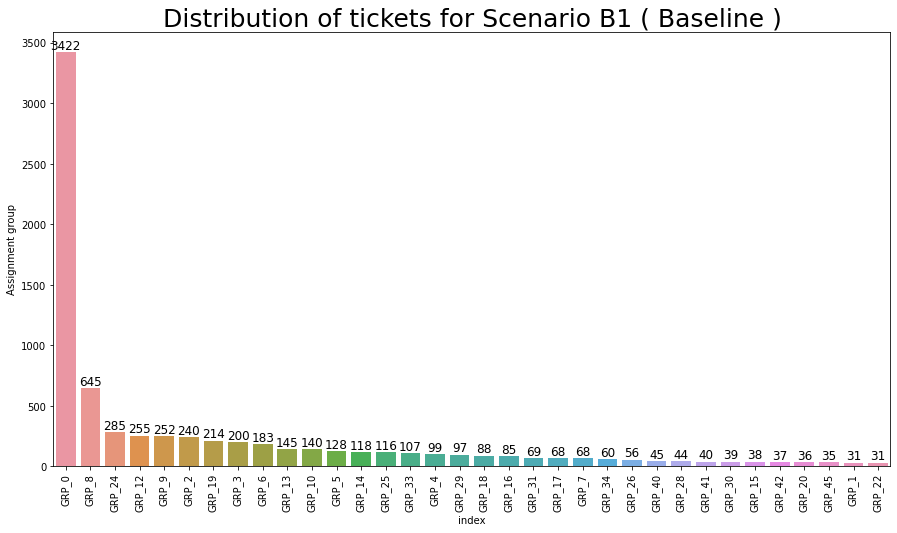

In [56]:
plt.subplots(figsize=(15,8))
df_t = df0[_LABEL].value_counts().to_frame().reset_index()
ax = sns.barplot(y=df_t[_LABEL],x=df_t['index'])
rects = ax.patches
labels = df_t[_LABEL]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=12)
plt.title("Distribution of tickets for Scenario B1 ( Baseline )",fontsize=25)
plt.xticks(rotation=90)
plt.show()

In [131]:
score_board_0 = pd.DataFrame(columns=['Model','Accuracy'])
ml_model_0 = [LogisticRegression(n_jobs=-1),\
              RandomForestClassifier(n_jobs=-1),\
              ExtraTreesClassifier(n_jobs=-1),\
              MultinomialNB(),GaussianNB(),\
              KNeighborsClassifier(n_jobs=-1),\
              OneVsRestClassifier(LinearSVC(loss='hinge',random_state=42),n_jobs=-1),\
              LinearSVC(loss='hinge')]


for models in ml_model_0:
  y_test,y_hat,_ = ml_model_master(df0,_TEXT,_LABEL,_CALLER,test_model=models,cv_only=False)
  accuracy_0 = accuracy_score(y_test,y_hat)
  score_board_0 = score_board_0.append({'Model':models.__class__.__name__, 'Accuracy': accuracy_0},ignore_index=True)
  clear_output(wait=True)
  display(score_board_0)


,Model,Accuracy
0,LogisticRegression,0.664894
1,RandomForestClassifier,0.648936
2,ExtraTreesClassifier,0.645612
3,MultinomialNB,0.614362
4,GaussianNB,0.481383
5,KNeighborsClassifier,0.584441
6,OneVsRestClassifier,0.640293
7,LinearSVC,0.640957


In [132]:
dl_model_0 = ['default','lda','glove']
for models in dl_model_0:
  dl_loss,dl_accuracy_0 = dl_model_master(df0,_TEXT,_LABEL,_CALLER,embedding_type = models,call_back_list=['liveplot','early_stop'],epochs=50)
  score_board_0 = score_board_0.append({'Model':'Bi-LSTM_'+ models, 'Accuracy': dl_accuracy_0},ignore_index=True)
  clear_output(wait=True)
  display(score_board_0)


,Model,Accuracy
0,LogisticRegression,0.664894
1,RandomForestClassifier,0.648936
2,ExtraTreesClassifier,0.645612
3,MultinomialNB,0.614362
4,GaussianNB,0.481383
5,KNeighborsClassifier,0.584441
6,OneVsRestClassifier,0.640293
7,LinearSVC,0.640957
8,Bi-LSTM_default,0.660904
9,Bi-LSTM_lda,0.666888


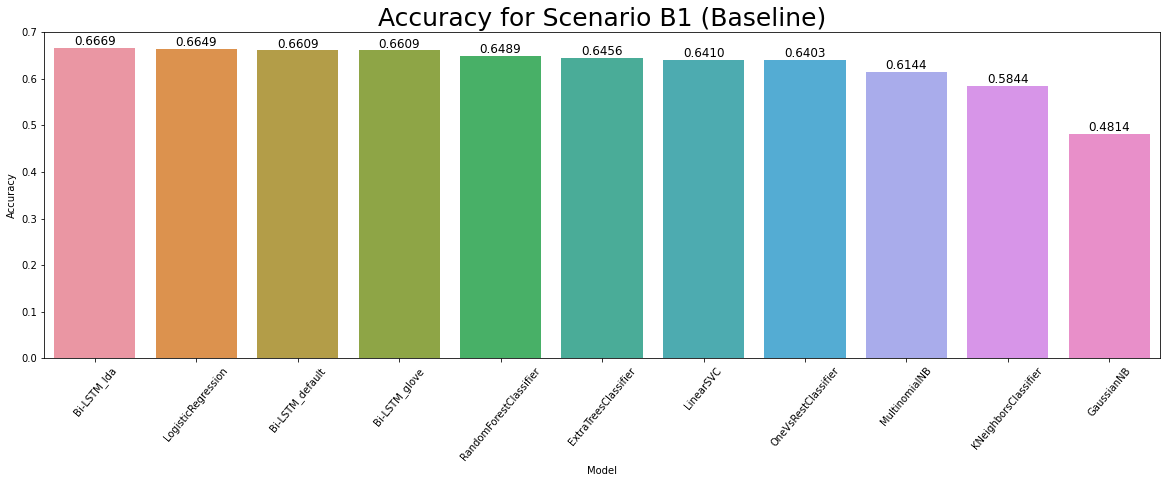

### Top 5 Models

,Model,Accuracy
9,Bi-LSTM_lda,0.666888
0,LogisticRegression,0.664894
8,Bi-LSTM_default,0.660904
10,Bi-LSTM_glove,0.660904
1,RandomForestClassifier,0.648936


In [136]:
display_board = score_board_0.sort_values(by='Accuracy',ascending=False)
plt.subplots(figsize=(20,6))
ax = sns.barplot(y='Accuracy',x='Model',data=display_board)
plt.title("Accuracy for Scenario B1 (Baseline)",fontsize=25)
rects = ax.patches
labels = display_board['Accuracy'].values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, f"{label:.4f}", ha='center', va='bottom', fontsize=12)
plt.xticks(rotation=50)
plt.show()
display(Markdown("### Top 5 Models"))
display(display_board[:5])


1. LSTM with LDA as embedding type has performed better than the rest.
2. This model has the caller info in it. Let's try removing it.

### Scenario B1 without Caller 

In [61]:
score_board_0 = pd.DataFrame(columns=['Model','Accuracy'])
ml_model_0 = [LogisticRegression(n_jobs=-1),\
              RandomForestClassifier(n_jobs=-1),\
              ExtraTreesClassifier(n_jobs=-1),\
              MultinomialNB(),GaussianNB(),\
              KNeighborsClassifier(n_jobs=-1),\
              OneVsRestClassifier(LinearSVC(loss='hinge',random_state=42),n_jobs=-1),\
              LinearSVC(loss='hinge')]


for models in ml_model_0:
  y_test,y_hat,_ = ml_model_master(df0,_TEXT,_LABEL,_CALLER,test_model=models,use_caller=False,cv_only=False)
  accuracy_0 = accuracy_score(y_test,y_hat)
  score_board_0 = score_board_0.append({'Model':models.__class__.__name__, 'Accuracy': accuracy_0},ignore_index=True)
  clear_output(wait=True)
  display(score_board_0)


,Model,Accuracy
0,LogisticRegression,0.660239
1,RandomForestClassifier,0.638963
2,ExtraTreesClassifier,0.642952
3,MultinomialNB,0.601064
4,GaussianNB,0.373670
5,KNeighborsClassifier,0.577128
6,OneVsRestClassifier,0.634973
7,LinearSVC,0.631649


1. There is no significant difference between having caller as inputs or not. But this could be just due to those groups that have much lower record numbers. We will try this experiment with a higher cutoff.

## Scenario B2 (All Records greater than 2 records)

In [22]:
###### Old Config ########
# _TEXT_INPUT = 'p_desc'
# _LABEL = 'Assignment group'
# _WORD_LEN_FIELD = 'Num_Words'
# _MIN_REC_COUNT = 100
# _MAX_REC_COUNT = 5000
# _MIN_WORD_LEN = 1
# _TEXT_AUGMENT_MINORITY = False
# _EMBEDDING_SIZE = 300
# _BATCH_SIZE = 50 
# _EPOCHS=50 
# _MAX_LENGTH = 100
# _MAX_FEATURES = 10000



###### ML Models : New Config ########
# max_features = 10000
# maxlen = 100
# # df = df3a
# # _TEXT = 'p_desc'
# # _LABEL = 'Assignment group'
# # _CALLER = 'Caller'
# use_caller = True
# test_size = 0.2
# random_state = 2021
# ngram_range = (1,3)
# vectorizer = 'keras'  # 'keras','tfidf'
# # test_model=LogisticRegression(C=1.3)
# cv_only=True,
# stratify = True
# label_encoding=True,
# scaling=True,
# n_jobs=-1,
# over_sampler_obj = None    #RandomOverSampler(sampling_strategy='minority',random_state=random_state) # Only RandomSampler is supported for now.
# text_aug_obj = TFIDFAugmentor() #SynonymAugmenter(aug_src='wordnet',aug_p=0.6) 

###### DL Models : New Config ########

# max_features = 10000
# maxlen = 100
# df = df3a
# _TEXT = 'p_desc'
# _LABEL = 'Assignment level'
# _CALLER = 'Caller'
# use_caller = True
# test_size = 0.2
# random_state = 2021
# embedding_type = 'lda' # 'default', 'glove','lda',  
# embedding_size = 300
# over_sampler_obj = None#RandomOverSampler(sampling_strategy='minority',random_state=random_state) # Only RandomSampler is supported for now.
# text_aug_obj = TFIDFAugmentor() #SynonymAugmenter(aug_src='wordnet',aug_p=0.6) 
# call_back_list =['liveplot','early_stop']
# epochs = 20
# batch_size = 50
# validation_split = 0.2
# ngram_range = (1,3)
# stratify = True

###### Common Config : New Config ########
_TEXT = 'p_desc'
_LABEL = 'Assignment group'
_WORD_LEN_FIELD = 'Num_Words'
_CALLER = 'Caller'
_MIN_REC_COUNT = 1
_MAX_REC_COUNT = 10000
_MIN_WORD_LEN = 1

In [23]:
dfb2 = df_p[df_p[_LABEL].notna()]
dfb2 = dfb2[dfb2[_LABEL].map((dfb2[_LABEL].value_counts() > _MIN_REC_COUNT) & (dfb2[_LABEL].value_counts() < _MAX_REC_COUNT))]
dfb2 = dfb2[dfb2[_WORD_LEN_FIELD] > _MIN_WORD_LEN]
dfb2.shape


(7891, 15)

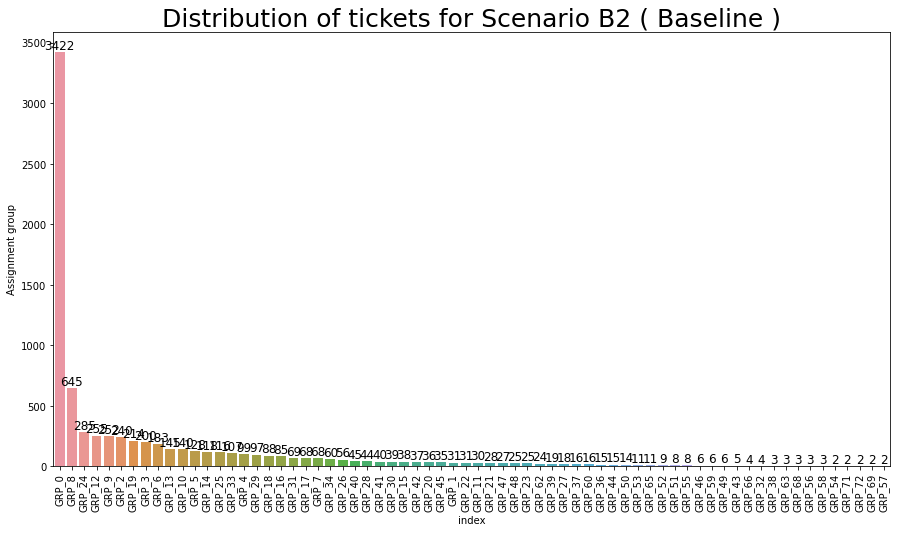

In [24]:
plt.subplots(figsize=(15,8))
df_t = dfb2[_LABEL].value_counts().to_frame().reset_index()
ax = sns.barplot(y=df_t[_LABEL],x=df_t['index'])
rects = ax.patches
labels = df_t[_LABEL]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=12)
plt.title("Distribution of tickets for Scenario B2 ( Baseline )",fontsize=25)
plt.xticks(rotation=90)
plt.show()


In [25]:
score_board_b2 = pd.DataFrame(columns=['Model','Accuracy'])
ml_model_b2 = [LogisticRegression(n_jobs=-1),\
              RandomForestClassifier(n_jobs=-1),\
              ExtraTreesClassifier(n_jobs=-1),\
              MultinomialNB(),GaussianNB(),\
              KNeighborsClassifier(n_jobs=-1),\
              OneVsRestClassifier(LinearSVC(loss='hinge',random_state=42),n_jobs=-1),\
              LinearSVC(loss='hinge')]


for models in ml_model_b2:
  y_test,y_hat,_ = ml_model_master(dfb2,_TEXT,_LABEL,_CALLER,test_model=models,cv_only=False)
  accuracy_b2 = accuracy_score(y_test,y_hat)
  score_board_b2 = score_board_b2.append({'Model':models.__class__.__name__, 'Accuracy': accuracy_b2},ignore_index=True)
  clear_output(wait=True)
  display(score_board_b2)



,Model,Accuracy
0,LogisticRegression,0.668144
1,RandomForestClassifier,0.632679
2,ExtraTreesClassifier,0.641545
3,MultinomialNB,0.591514
4,GaussianNB,0.473718
5,KNeighborsClassifier,0.560481
6,OneVsRestClassifier,0.630146
7,LinearSVC,0.632679


In [26]:
dl_model_b2 = ['default','glove']
for models in dl_model_b2:
  dl_loss,dl_accuracy_b2 = dl_model_master(dfb2,_TEXT,_LABEL,_CALLER,embedding_type = models,call_back_list=['liveplot','early_stop'],epochs=50)
  score_board_b2 = score_board_b2.append({'Model':'Bi-LSTM_'+ models, 'Accuracy': dl_accuracy_b2},ignore_index=True)
  clear_output(wait=True)
  display(score_board_b2)



,Model,Accuracy
0,LogisticRegression,0.668144
1,RandomForestClassifier,0.632679
2,ExtraTreesClassifier,0.641545
3,MultinomialNB,0.591514
4,GaussianNB,0.473718
5,KNeighborsClassifier,0.560481
6,OneVsRestClassifier,0.630146
7,LinearSVC,0.632679
8,Bi-LSTM_default,0.647245
9,Bi-LSTM_glove,0.644712


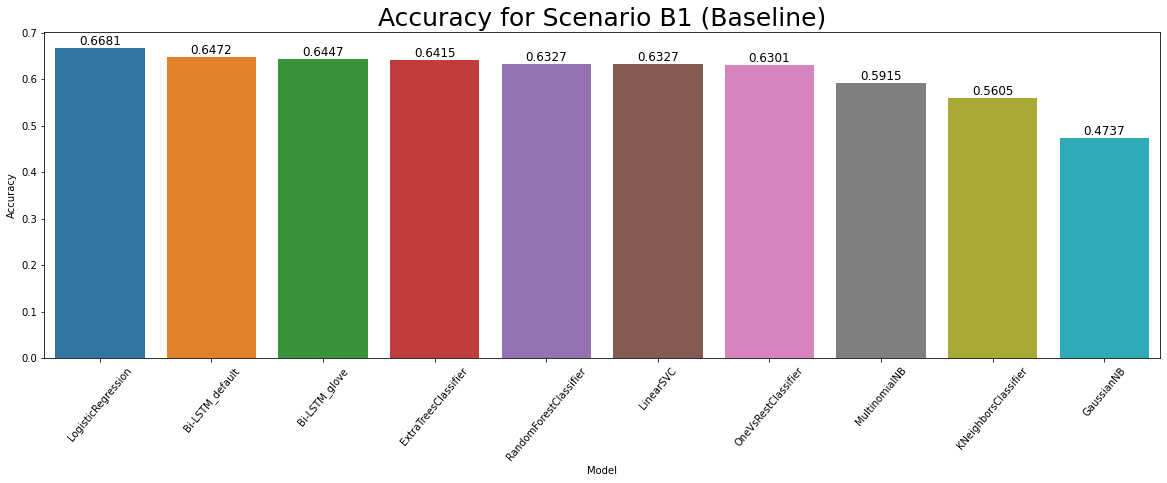

### Top 5 Models

,Model,Accuracy
0,LogisticRegression,0.668144
8,Bi-LSTM_default,0.647245
9,Bi-LSTM_glove,0.644712
2,ExtraTreesClassifier,0.641545
1,RandomForestClassifier,0.632679


In [27]:
display_board = score_board_b2.sort_values(by='Accuracy',ascending=False)
plt.subplots(figsize=(20,6))
ax = sns.barplot(y='Accuracy',x='Model',data=display_board)
plt.title("Accuracy for Scenario B1 (Baseline)",fontsize=25)
rects = ax.patches
labels = display_board['Accuracy'].values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, f"{label:.4f}", ha='center', va='bottom', fontsize=12)
plt.xticks(rotation=50)
plt.show()
display(Markdown("### Top 5 Models"))
display(display_board[:5])


# 1 Model Approach:

This is a simpler approach where the text is classified into one of the Assignment groups by a single model. This is closer to the baseline model with the exception of the cutoff for the record count per group.
#### Preconditions: 
>1. Text data with their original labels as “Assignment group”.
#### Method: 
>1. Model 1- Classifies  tickets between different Assignment groups .
#### Scenarios: 
>1. Scenario 1  Imbalance Data
>2. Scenario 1a Imbalanced data with OverSampling




## Scenario 1 - Imbalanced Data

In [64]:
###### Old Config ########
# _TEXT_INPUT = 'p_desc'
# _LABEL = 'Assignment group'
# _WORD_LEN_FIELD = 'Num_Words'
# _MIN_REC_COUNT = 100
# _MAX_REC_COUNT = 5000
# _MIN_WORD_LEN = 1
# _TEXT_AUGMENT_MINORITY = False
# _EMBEDDING_SIZE = 300
# _BATCH_SIZE = 50 
# _EPOCHS=50 
# _MAX_LENGTH = 100
# _MAX_FEATURES = 10000



###### ML Models : New Config ########
# max_features = 10000
# maxlen = 100
# # df = df3a
# # _TEXT = 'p_desc'
# # _LABEL = 'Assignment group'
# # _CALLER = 'Caller'
# use_caller = True
# test_size = 0.2
# random_state = 2021
# ngram_range = (1,3)
# vectorizer = 'keras'  # 'keras','tfidf'
# # test_model=LogisticRegression(C=1.3)
# cv_only=True,
# stratify = True
# label_encoding=True,
# scaling=True,
# n_jobs=-1,
# over_sampler_obj = None    #RandomOverSampler(sampling_strategy='minority',random_state=random_state) # Only RandomSampler is supported for now.
# text_aug_obj = TFIDFAugmentor() #SynonymAugmenter(aug_src='wordnet',aug_p=0.6) 

###### DL Models : New Config ########

# max_features = 10000
# maxlen = 100
# df = df3a
# _TEXT = 'p_desc'
# _LABEL = 'Assignment level'
# _CALLER = 'Caller'
# use_caller = True
# test_size = 0.2
# random_state = 2021
# embedding_type = 'lda' # 'default', 'glove','lda',  
# embedding_size = 300
# over_sampler_obj = None#RandomOverSampler(sampling_strategy='minority',random_state=random_state) # Only RandomSampler is supported for now.
# text_aug_obj = TFIDFAugmentor() #SynonymAugmenter(aug_src='wordnet',aug_p=0.6) 
# call_back_list =['liveplot','early_stop']
# epochs = 20
# batch_size = 50
# validation_split = 0.2
# ngram_range = (1,3)
# stratify = True

###### Common Config : New Config ########
_TEXT = 'p_desc'
_LABEL = 'Assignment group'
_WORD_LEN_FIELD = 'Num_Words'
_CALLER = 'Caller'
_MIN_REC_COUNT = 100
_MAX_REC_COUNT = 5000
_MIN_WORD_LEN = 1

In [65]:
df1 = df_p[df_p[_LABEL].notna()]
df1 = df1[df1[_LABEL].map((df1[_LABEL].value_counts() > _MIN_REC_COUNT) & (df1[_LABEL].value_counts() < _MAX_REC_COUNT))]
df1 = df1[df1[_WORD_LEN_FIELD] > _MIN_WORD_LEN]
df1.shape

(6450, 15)

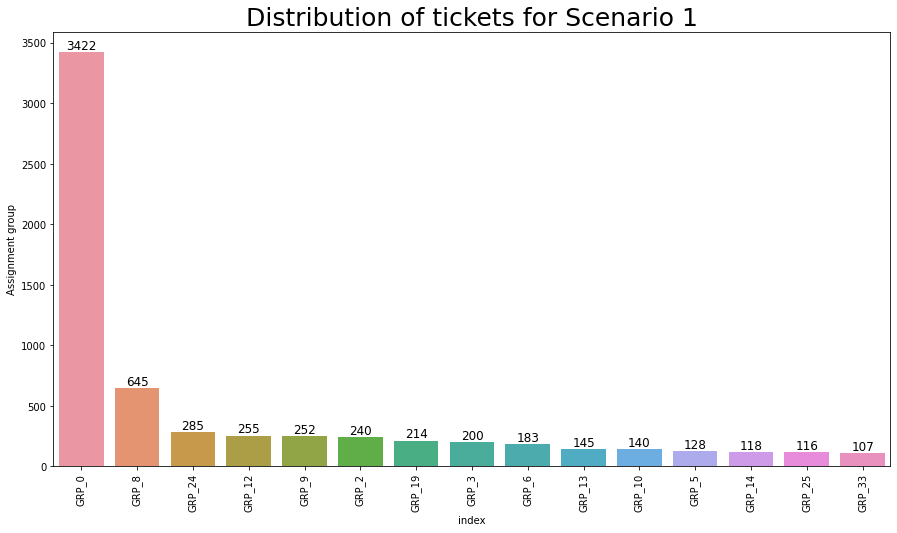

In [66]:
df_t = df1[_LABEL].value_counts().to_frame().reset_index()

plt.subplots(figsize=(15,8))
ax = sns.barplot(y=df_t[_LABEL],x=df_t['index'])
rects = ax.patches
labels = df_t[_LABEL]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=12)
plt.title("Distribution of tickets for Scenario 1",fontsize=25)
plt.xticks(rotation=90)
plt.show()

In [25]:
score_board_1 = pd.DataFrame(columns=['Model','Accuracy'])
ml_model_1 = [LogisticRegression(n_jobs=-1),\
              RandomForestClassifier(n_jobs=-1),\
              ExtraTreesClassifier(n_jobs=-1),\
              MultinomialNB(),GaussianNB(),\
              KNeighborsClassifier(n_jobs=-1),\
              OneVsRestClassifier(LinearSVC(loss='hinge',random_state=42),n_jobs=-1),\
              LinearSVC(loss='hinge')]


for models in ml_model_1:
  y_test,y_hat,_ = ml_model_master(df1,_TEXT,_LABEL,_CALLER,test_model=models,cv_only=False)
  accuracy_1 = accuracy_score(y_test,y_hat)
  score_board_1 = score_board_1.append({'Model':models.__class__.__name__, 'Accuracy': accuracy_1},ignore_index=True)
  clear_output(wait=True)
  display(score_board_1)


,Model,Accuracy
0,LogisticRegression,0.748837
1,RandomForestClassifier,0.731783
2,ExtraTreesClassifier,0.732558
3,MultinomialNB,0.710853
4,GaussianNB,0.577519
5,KNeighborsClassifier,0.696124
6,OneVsRestClassifier,0.719380
7,LinearSVC,0.758140


In [26]:
dl_model_1 = ['default','lda','glove']
for models in dl_model_1:
  dl_loss,dl_accuracy_1 = dl_model_master(df1,_TEXT,_LABEL,_CALLER,embedding_type = models,call_back_list=['liveplot','early_stop'],epochs=50)
  score_board_1 = score_board_1.append({'Model':'Bi-LSTM_'+ models, 'Accuracy': dl_accuracy_1},ignore_index=True)
  clear_output(wait=True)
  display(score_board_1)


,Model,Accuracy
0,LogisticRegression,0.748837
1,RandomForestClassifier,0.731783
2,ExtraTreesClassifier,0.732558
3,MultinomialNB,0.710853
4,GaussianNB,0.577519
5,KNeighborsClassifier,0.696124
6,OneVsRestClassifier,0.719380
7,LinearSVC,0.758140
8,Bi-LSTM_default,0.729457
9,Bi-LSTM_lda,0.723256


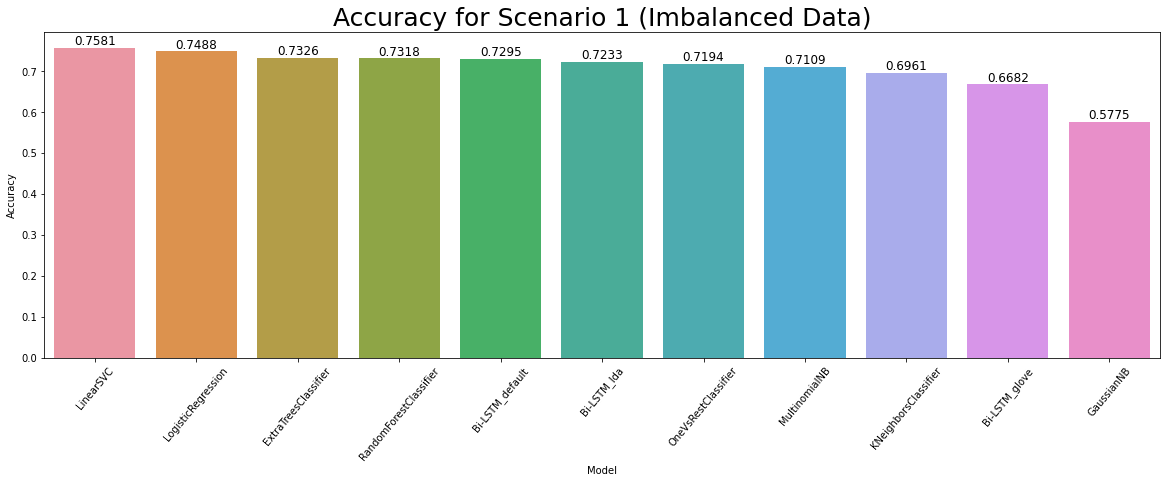

### Top 5 Models

,Model,Accuracy
7,LinearSVC,0.758140
0,LogisticRegression,0.748837
2,ExtraTreesClassifier,0.732558
1,RandomForestClassifier,0.731783
8,Bi-LSTM_default,0.729457


In [27]:
display_board = score_board_1.sort_values(by='Accuracy',ascending=False)
plt.subplots(figsize=(20,6))
ax = sns.barplot(y='Accuracy',x='Model',data=display_board)
plt.title("Accuracy for Scenario 1 (Imbalanced Data)",fontsize=25)
rects = ax.patches
labels = display_board['Accuracy'].values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, f"{label:.4f}", ha='center', va='bottom', fontsize=12)
plt.xticks(rotation=50)
plt.show()
display(Markdown("### Top 5 Models"))
display(display_board[:5])


1. LinearSVC seems to have performed better than the rest of ML and DL models.

In [28]:
gc.collect()

57347

### Scenario 1 (With Oversampling)

In [29]:
score_board_1_os = pd.DataFrame(columns=['Model','Accuracy'])
ml_model_1_os = [LogisticRegression(n_jobs=-1),\
              RandomForestClassifier(n_jobs=-1),\
              ExtraTreesClassifier(n_jobs=-1),\
              MultinomialNB(),GaussianNB(),\
              KNeighborsClassifier(n_jobs=-1),\
              OneVsRestClassifier(LinearSVC(loss='hinge',random_state=42),n_jobs=-1),\
              LinearSVC(loss='hinge')]

ros = RandomOverSampler(sampling_strategy='not majority',random_state=random_state)

for models in ml_model_1_os:
  y_test,y_hat,_ = ml_model_master(df1,_TEXT,_LABEL,_CALLER,test_model=models,cv_only=False,over_sampler_obj=ros,stratify=True)
  accuracy_1_os = accuracy_score(y_test,y_hat)
  score_board_1_os = score_board_1_os.append({'Model':models.__class__.__name__, 'Accuracy': accuracy_1_os},ignore_index=True)
  clear_output(wait=True)
  display(score_board_1_os)

,Model,Accuracy
0,LogisticRegression,0.734109
1,RandomForestClassifier,0.718605
2,ExtraTreesClassifier,0.712403
3,MultinomialNB,0.671318
4,GaussianNB,0.577519
5,KNeighborsClassifier,0.624031
6,OneVsRestClassifier,0.708527
7,LinearSVC,0.704651


In [30]:
dl_model_1_os = ['default','lda','glove']
ros = RandomOverSampler(sampling_strategy='minority',random_state=random_state)

for models in dl_model_1_os:
  dl_loss,dl_accuracy_1_os = dl_model_master(df1,_TEXT,_LABEL,_CALLER,embedding_type = models,call_back_list=['liveplot','early_stop'],epochs=50,over_sampler_obj=ros)
  score_board_1_os = score_board_1_os.append({'Model':'Bi-LSTM_'+ models, 'Accuracy': dl_accuracy_1_os},ignore_index=True)
  clear_output(wait=True)
  display(score_board_1_os)


,Model,Accuracy
0,LogisticRegression,0.734109
1,RandomForestClassifier,0.718605
2,ExtraTreesClassifier,0.712403
3,MultinomialNB,0.671318
4,GaussianNB,0.577519
5,KNeighborsClassifier,0.624031
6,OneVsRestClassifier,0.708527
7,LinearSVC,0.704651
8,Bi-LSTM_default,0.729457
9,Bi-LSTM_lda,0.733333


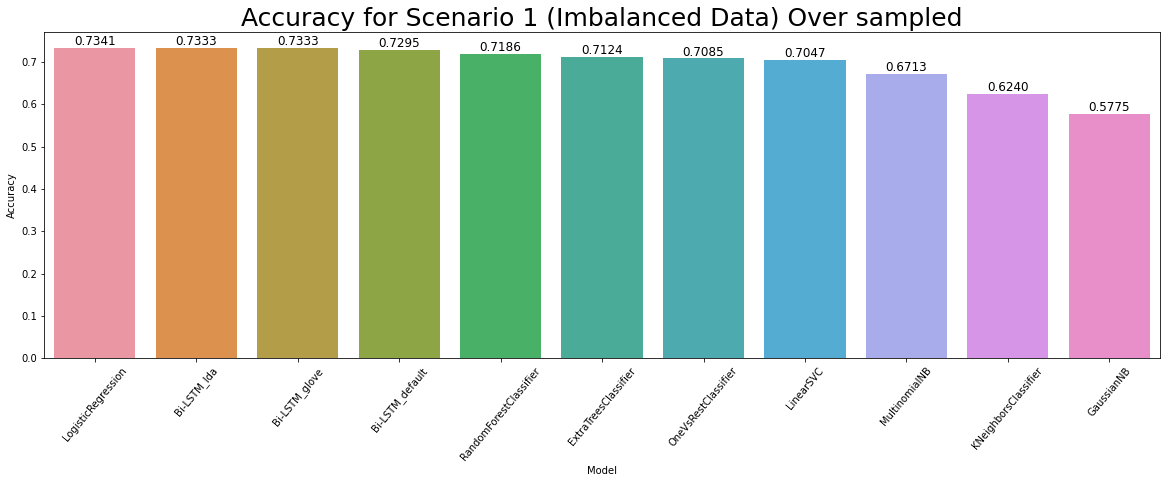

### Top 5 Models

,Model,Accuracy
0,LogisticRegression,0.734109
9,Bi-LSTM_lda,0.733333
10,Bi-LSTM_glove,0.733333
8,Bi-LSTM_default,0.729457
1,RandomForestClassifier,0.718605


In [31]:
display_board = score_board_1_os.sort_values(by='Accuracy',ascending=False)
plt.subplots(figsize=(20,6))
ax = sns.barplot(y='Accuracy',x='Model',data=display_board)
plt.title("Accuracy for Scenario 1 (Imbalanced Data) Over sampled",fontsize=25)
rects = ax.patches
labels = display_board['Accuracy'].values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, f"{label:.4f}", ha='center', va='bottom', fontsize=12)
plt.xticks(rotation=50)
plt.show()
display(Markdown("### Top 5 Models"))
display(display_board[:5])


1. Oversampling does not seem to help much here and infact is driving the accuracy lower than without oversampling.

### Scenario 1 without Caller

In [67]:
score_board_1 = pd.DataFrame(columns=['Model','Accuracy'])
ml_model_1 = [LogisticRegression(n_jobs=-1),\
              RandomForestClassifier(n_jobs=-1),\
              ExtraTreesClassifier(n_jobs=-1),\
              MultinomialNB(),GaussianNB(),\
              KNeighborsClassifier(n_jobs=-1),\
              OneVsRestClassifier(LinearSVC(loss='hinge',random_state=42),n_jobs=-1),\
              LinearSVC(loss='hinge')]


for models in ml_model_1:
  y_test,y_hat,_ = ml_model_master(df1,_TEXT,_LABEL,_CALLER,test_model=models,use_caller=False,cv_only=False)
  accuracy_1 = accuracy_score(y_test,y_hat)
  score_board_1 = score_board_1.append({'Model':models.__class__.__name__, 'Accuracy': accuracy_1},ignore_index=True)
  clear_output(wait=True)
  display(score_board_1)


,Model,Accuracy
0,LogisticRegression,0.737984
1,RandomForestClassifier,0.726357
2,ExtraTreesClassifier,0.734109
3,MultinomialNB,0.696899
4,GaussianNB,0.451938
5,KNeighborsClassifier,0.689922
6,OneVsRestClassifier,0.738760
7,LinearSVC,0.708527


1. Here we see a difference in the performance of every model and the performance has dropped by atleast 1%.
2. We conclude that inclusion of Caller column would drive better accuracies.

In [62]:
gc.collect()

31248

# Scenario 2 (2 Model Approach)

## Scenario 2a - Group0 Vs Rest

In [28]:
###### Old Config ########
# _TEXT_INPUT = 'p_desc'
# _LABEL = 'Assignment group'
# _WORD_LEN_FIELD = 'Num_Words'
# _MIN_REC_COUNT = 100
# _MAX_REC_COUNT = 5000
# _MIN_WORD_LEN = 1
# _TEXT_AUGMENT_MINORITY = False
# _EMBEDDING_SIZE = 300
# _BATCH_SIZE = 50 
# _EPOCHS=50 
# _MAX_LENGTH = 100
# _MAX_FEATURES = 10000



###### ML Models : New Config ########
# max_features = 10000
# maxlen = 100
# # df = df3a
# # _TEXT = 'p_desc'
# # _LABEL = 'Assignment group'
# # _CALLER = 'Caller'
# use_caller = True
# test_size = 0.2
# random_state = 2021
# ngram_range = (1,3)
# vectorizer = 'keras'  # 'keras','tfidf'
# # test_model=LogisticRegression(C=1.3)
# cv_only=True,
# stratify = True
# label_encoding=True,
# scaling=True,
# n_jobs=-1,
# over_sampler_obj = None    #RandomOverSampler(sampling_strategy='minority',random_state=random_state) # Only RandomSampler is supported for now.
# text_aug_obj = TFIDFAugmentor() #SynonymAugmenter(aug_src='wordnet',aug_p=0.6) 

###### DL Models : New Config ########

# max_features = 10000
# maxlen = 100
# df = df3a
# _TEXT = 'p_desc'
# _LABEL = 'Assignment level'
# _CALLER = 'Caller'
# use_caller = True
# test_size = 0.2
# random_state = 2021
# embedding_type = 'lda' # 'default', 'glove','lda',  
# embedding_size = 300
# over_sampler_obj = None#RandomOverSampler(sampling_strategy='minority',random_state=random_state) # Only RandomSampler is supported for now.
# text_aug_obj = TFIDFAugmentor() #SynonymAugmenter(aug_src='wordnet',aug_p=0.6) 
# call_back_list =['liveplot','early_stop']
# epochs = 20
# batch_size = 50
# validation_split = 0.2
# ngram_range = (1,3)
# stratify = True

###### Common Config : New Config ########

_TEXT = 'p_desc'
_LABEL = 'isGRP_0'
_WORD_LEN_FIELD = 'Num_Words'
_CALLER = 'Caller'
_MIN_REC_COUNT = 100
_MAX_REC_COUNT = 5000
_MIN_WORD_LEN = 1

In [29]:
df2a = df_p[df_p[_LABEL].notna()]
df2a = df2a[df2a[_LABEL].map((df2a[_LABEL].value_counts() > _MIN_REC_COUNT) & (df2a[_LABEL].value_counts() < _MAX_REC_COUNT))]
df2a = df2a[df2a[_WORD_LEN_FIELD] > _MIN_WORD_LEN]
df2a.shape

(7855, 15)

In [30]:
df2a.isna().sum()

Short description          0
Description                0
Caller                     0
Assignment group           0
combined_description       0
lang                       0
trans_status               0
translated_text            0
post_lang                  0
p_desc                     0
Num_Words                  0
isGRP_0                    0
Pass_2_label            3407
Assignment level           0
L1L2                    3804
dtype: int64

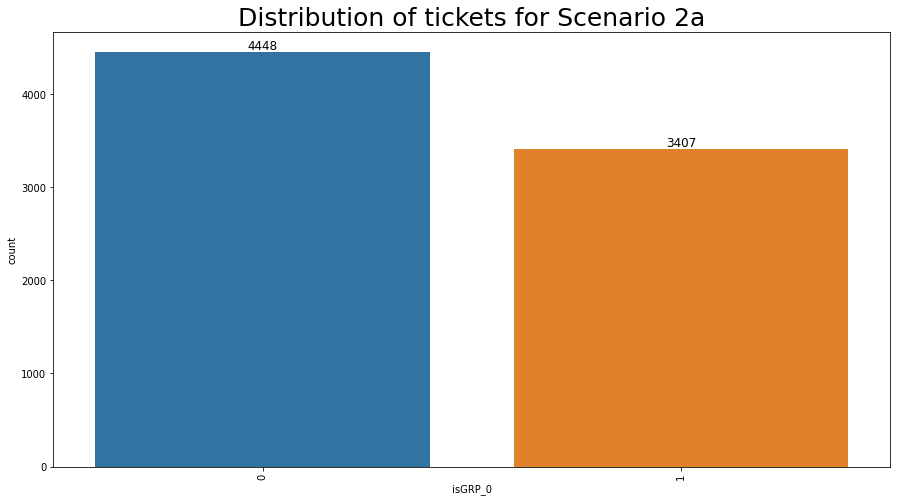

In [31]:
plt.subplots(figsize=(15,8))
ax = sns.countplot(x=df2a[_LABEL])
rects = ax.patches
labels = df2a[_LABEL].value_counts()
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=12)
plt.title("Distribution of tickets for Scenario 2a",fontsize=25)
plt.xticks(rotation=90)
plt.show()

In [32]:
score_board_2a = pd.DataFrame(columns=['Model','Accuracy'])
ml_model_2a = [LogisticRegression(n_jobs=-1),\
              RandomForestClassifier(n_jobs=-1),\
              ExtraTreesClassifier(n_jobs=-1),\
              MultinomialNB(),GaussianNB(),\
              KNeighborsClassifier(n_jobs=-1),\
              OneVsRestClassifier(LinearSVC(loss='hinge',random_state=42),n_jobs=-1),\
              LinearSVC(loss='hinge')]


for models in ml_model_2a:
  y_test,y_hat,_ = ml_model_master(df2a,_TEXT,_LABEL,_CALLER,test_model=models,cv_only=False)
  accuracy_2a = accuracy_score(y_test,y_hat)
  score_board_2a = score_board_2a.append({'Model':models.__class__.__name__, 'Accuracy': accuracy_2a},ignore_index=True)
  clear_output(wait=True)
  display(score_board_2a)


,Model,Accuracy
0,LogisticRegression,0.840866
1,RandomForestClassifier,0.844048
2,ExtraTreesClassifier,0.842775
3,MultinomialNB,0.826862
4,GaussianNB,0.775302
5,KNeighborsClassifier,0.753024
6,OneVsRestClassifier,0.826225
7,LinearSVC,0.826225


In [33]:
dl_model_2a = ['default','lda','glove']
for models in dl_model_2a:
  dl_loss,dl_accuracy_2a = dl_model_master(df2a,_TEXT,_LABEL,_CALLER,embedding_type = models,call_back_list=['liveplot','early_stop'],epochs=50)
  score_board_2a = score_board_2a.append({'Model':'Bi-LSTM_'+ models, 'Accuracy': dl_accuracy_2a},ignore_index=True)
  clear_output(wait=True)
  display(score_board_2a)


,Model,Accuracy
0,LogisticRegression,0.840866
1,RandomForestClassifier,0.844048
2,ExtraTreesClassifier,0.842775
3,MultinomialNB,0.826862
4,GaussianNB,0.775302
5,KNeighborsClassifier,0.753024
6,OneVsRestClassifier,0.826225
7,LinearSVC,0.826225
8,Bi-LSTM_default,0.679185
9,Bi-LSTM_lda,0.814768


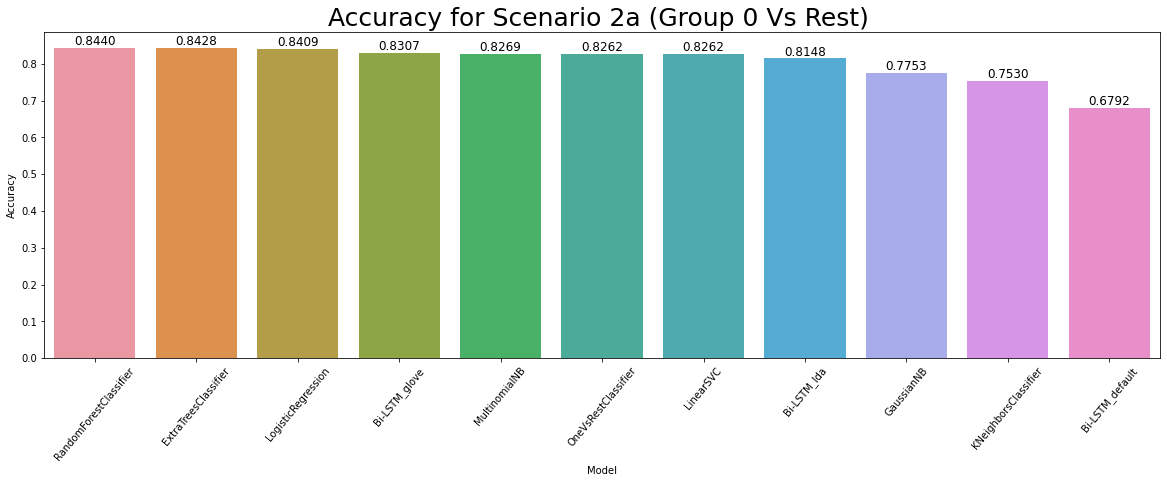

### Top 5 Models

,Model,Accuracy
1,RandomForestClassifier,0.844048
2,ExtraTreesClassifier,0.842775
0,LogisticRegression,0.840866
10,Bi-LSTM_glove,0.830681
3,MultinomialNB,0.826862


In [34]:
display_board = score_board_2a.sort_values(by='Accuracy',ascending=False)
plt.subplots(figsize=(20,6))
ax = sns.barplot(y='Accuracy',x='Model',data=display_board)
plt.title("Accuracy for Scenario 2a (Group 0 Vs Rest) ",fontsize=25)
rects = ax.patches
labels = display_board['Accuracy'].values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, f"{label:.4f}", ha='center', va='bottom', fontsize=12)
plt.xticks(rotation=50)
plt.show()
display(Markdown("### Top 5 Models"))
display(display_board[:5])


In [35]:
gc.collect()

77723

## Scenario (2b) - Non Group 0

In [26]:
###### Old Config ########
# _TEXT_INPUT = 'p_desc'
# _LABEL = 'Assignment group'
# _WORD_LEN_FIELD = 'Num_Words'
# _MIN_REC_COUNT = 100
# _MAX_REC_COUNT = 5000
# _MIN_WORD_LEN = 1
# _TEXT_AUGMENT_MINORITY = False
# _EMBEDDING_SIZE = 300
# _BATCH_SIZE = 50 
# _EPOCHS=50 
# _MAX_LENGTH = 100
# _MAX_FEATURES = 10000



###### ML Models : New Config ########
# max_features = 10000
# maxlen = 100
# # df = df3a
# # _TEXT = 'p_desc'
# # _LABEL = 'Assignment group'
# # _CALLER = 'Caller'
# use_caller = True
# test_size = 0.2
# random_state = 2021
# ngram_range = (1,3)
# vectorizer = 'keras'  # 'keras','tfidf'
# # test_model=LogisticRegression(C=1.3)
# cv_only=True,
# stratify = True
# label_encoding=True,
# scaling=True,
# n_jobs=-1,
# over_sampler_obj = None    #RandomOverSampler(sampling_strategy='minority',random_state=random_state) # Only RandomSampler is supported for now.
# text_aug_obj = TFIDFAugmentor() #SynonymAugmenter(aug_src='wordnet',aug_p=0.6) 

###### DL Models : New Config ########

# max_features = 10000
# maxlen = 100
# df = df3a
# _TEXT = 'p_desc'
# _LABEL = 'Assignment level'
# _CALLER = 'Caller'
# use_caller = True
# test_size = 0.2
# random_state = 2021
# embedding_type = 'lda' # 'default', 'glove','lda',  
# embedding_size = 300
# over_sampler_obj = None#RandomOverSampler(sampling_strategy='minority',random_state=random_state) # Only RandomSampler is supported for now.
# text_aug_obj = TFIDFAugmentor() #SynonymAugmenter(aug_src='wordnet',aug_p=0.6) 
# call_back_list =['liveplot','early_stop']
# epochs = 20
# batch_size = 50
# validation_split = 0.2
# ngram_range = (1,3)
# stratify = True

###### Common Config : New Config ########

_TEXT = 'p_desc'
_LABEL = 'Pass_2_label'
_WORD_LEN_FIELD = 'Num_Words'
_CALLER = 'Caller'
_MIN_REC_COUNT = 100
_MAX_REC_COUNT = 1000
_MIN_WORD_LEN = 1


In [27]:
df2b = df_p[df_p[_LABEL].notna()]
df2b = df2b[df2b[_LABEL].map((df2b[_LABEL].value_counts() > _MIN_REC_COUNT) & (df2b[_LABEL].value_counts() < _MAX_REC_COUNT))]
df2b = df2b[df2b[_WORD_LEN_FIELD] > _MIN_WORD_LEN]
df2b.shape

(3028, 15)

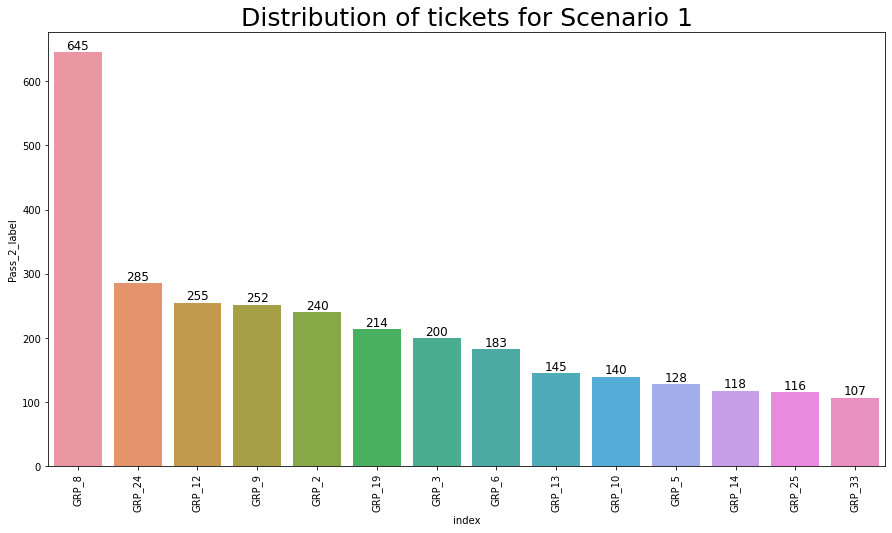

In [28]:
df_t = df2b[_LABEL].value_counts().to_frame().reset_index()

plt.subplots(figsize=(15,8))
ax = sns.barplot(y=df_t[_LABEL],x=df_t['index'])
rects = ax.patches
labels = df_t[_LABEL]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=12)
plt.title("Distribution of tickets for Scenario 1",fontsize=25)
plt.xticks(rotation=90)
plt.show()

### Scenario (2b) - Without Oversampling

In [39]:
score_board_2b = pd.DataFrame(columns=['Model','Accuracy'])
ml_model_2b = [LogisticRegression(n_jobs=-1),\
              RandomForestClassifier(n_jobs=-1),\
              ExtraTreesClassifier(n_jobs=-1),\
              MultinomialNB(),GaussianNB(),\
              KNeighborsClassifier(n_jobs=-1),\
              OneVsRestClassifier(LinearSVC(loss='hinge',random_state=42),n_jobs=-1),\
              LinearSVC(loss='hinge')]


for models in ml_model_2b:
  y_test,y_hat,_ = ml_model_master(df2b,_TEXT,_LABEL,_CALLER,test_model=models,cv_only=False)
  accuracy_2b = accuracy_score(y_test,y_hat)
  score_board_2b = score_board_2b.append({'Model':models.__class__.__name__, 'Accuracy': accuracy_2b},ignore_index=True)
  clear_output(wait=True)
  display(score_board_2b)

,Model,Accuracy
0,LogisticRegression,0.667221
1,RandomForestClassifier,0.642263
2,ExtraTreesClassifier,0.652246
3,MultinomialNB,0.637271
4,GaussianNB,0.519135
5,KNeighborsClassifier,0.454243
6,OneVsRestClassifier,0.660566
7,LinearSVC,0.655574


In [40]:
dl_model_2b = ['default','lda','glove']
for models in dl_model_2b:
  dl_loss,dl_accuracy_2b = dl_model_master(df2b,_TEXT,_LABEL,_CALLER,embedding_type = models,call_back_list=['liveplot','early_stop'],epochs=50)
  score_board_2b = score_board_2b.append({'Model':'Bi-LSTM_'+ models, 'Accuracy': dl_accuracy_2b},ignore_index=True)
  clear_output(wait=True)
  display(score_board_2b)


,Model,Accuracy
0,LogisticRegression,0.667221
1,RandomForestClassifier,0.642263
2,ExtraTreesClassifier,0.652246
3,MultinomialNB,0.637271
4,GaussianNB,0.519135
5,KNeighborsClassifier,0.454243
6,OneVsRestClassifier,0.660566
7,LinearSVC,0.655574
8,Bi-LSTM_default,0.658902
9,Bi-LSTM_lda,0.642263


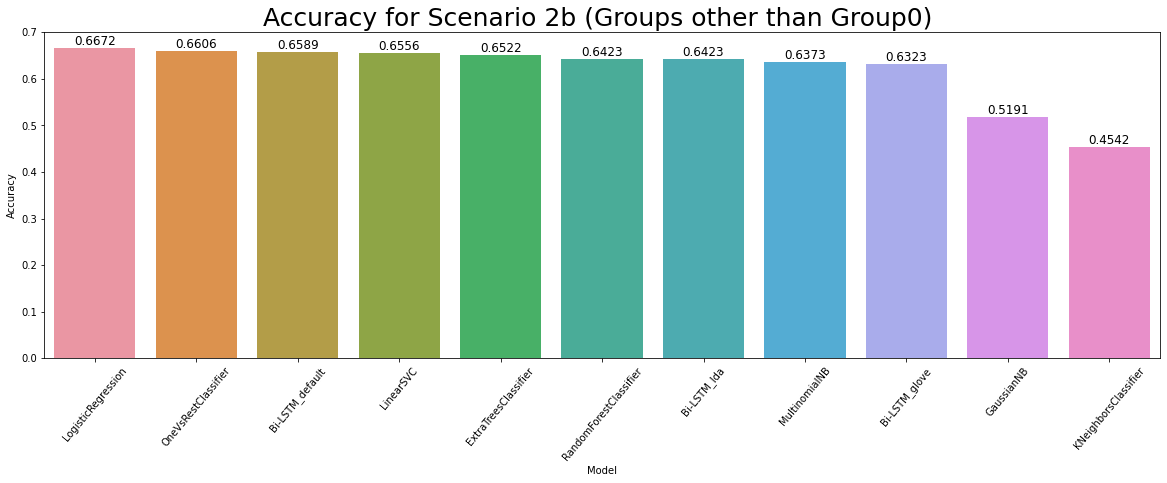

### Top 5 Models

,Model,Accuracy
0,LogisticRegression,0.667221
6,OneVsRestClassifier,0.660566
8,Bi-LSTM_default,0.658902
7,LinearSVC,0.655574
2,ExtraTreesClassifier,0.652246


In [41]:
display_board = score_board_2b.sort_values(by='Accuracy',ascending=False)
plt.subplots(figsize=(20,6))
ax = sns.barplot(y='Accuracy',x='Model',data=display_board)
plt.title("Accuracy for Scenario 2b (Groups other than Group0) ",fontsize=25)
rects = ax.patches
labels = display_board['Accuracy'].values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, f"{label:.4f}", ha='center', va='bottom', fontsize=12)
plt.xticks(rotation=50)
plt.show()
display(Markdown("### Top 5 Models"))
display(display_board[:5])

In [42]:
gc.collect()

133313



### Scenario (2b) with Oversampling


In [43]:
score_board_2b_os = pd.DataFrame(columns=['Model','Accuracy'])
ml_model_2b_os = [LogisticRegression(n_jobs=-1),\
              RandomForestClassifier(n_jobs=-1),\
              ExtraTreesClassifier(n_jobs=-1),\
              MultinomialNB(),GaussianNB(),\
              KNeighborsClassifier(n_jobs=-1),\
              OneVsRestClassifier(LinearSVC(loss='hinge',random_state=42),n_jobs=-1),\
              LinearSVC(loss='hinge')]

ros = RandomOverSampler(sampling_strategy='not majority',random_state=random_state)

for models in ml_model_2b_os:
  y_test,y_hat,_ = ml_model_master(df2b,_TEXT,_LABEL,_CALLER,test_model=models,cv_only=False,over_sampler_obj=ros)
  accuracy_2b_os = accuracy_score(y_test,y_hat)
  score_board_2b_os = score_board_2b_os.append({'Model':models.__class__.__name__, 'Accuracy': accuracy_2b_os},ignore_index=True)
  clear_output(wait=True)
  display(score_board_2b_os)

,Model,Accuracy
0,LogisticRegression,0.635607
1,RandomForestClassifier,0.610649
2,ExtraTreesClassifier,0.615641
3,MultinomialNB,0.582363
4,GaussianNB,0.519135
5,KNeighborsClassifier,0.457571
6,OneVsRestClassifier,0.622296
7,LinearSVC,0.577371


In [44]:
dl_model_2b_os = ['default','lda','glove']

ros = RandomOverSampler(sampling_strategy='minority',random_state=random_state)

for models in dl_model_2b_os:
  dl_loss,dl_accuracy_2b_os = dl_model_master(df2b,_TEXT,_LABEL,_CALLER,embedding_type = models,call_back_list=['liveplot','early_stop'],epochs=50,over_sampler_obj=ros)
  score_board_2b_os = score_board_2b_os.append({'Model':'Bi-LSTM_'+ models, 'Accuracy': dl_accuracy_2b_os},ignore_index=True)
  clear_output(wait=True)
  display(score_board_2b_os)

,Model,Accuracy
0,LogisticRegression,0.635607
1,RandomForestClassifier,0.610649
2,ExtraTreesClassifier,0.615641
3,MultinomialNB,0.582363
4,GaussianNB,0.519135
5,KNeighborsClassifier,0.457571
6,OneVsRestClassifier,0.622296
7,LinearSVC,0.577371
8,Bi-LSTM_default,0.665557
9,Bi-LSTM_lda,0.683860


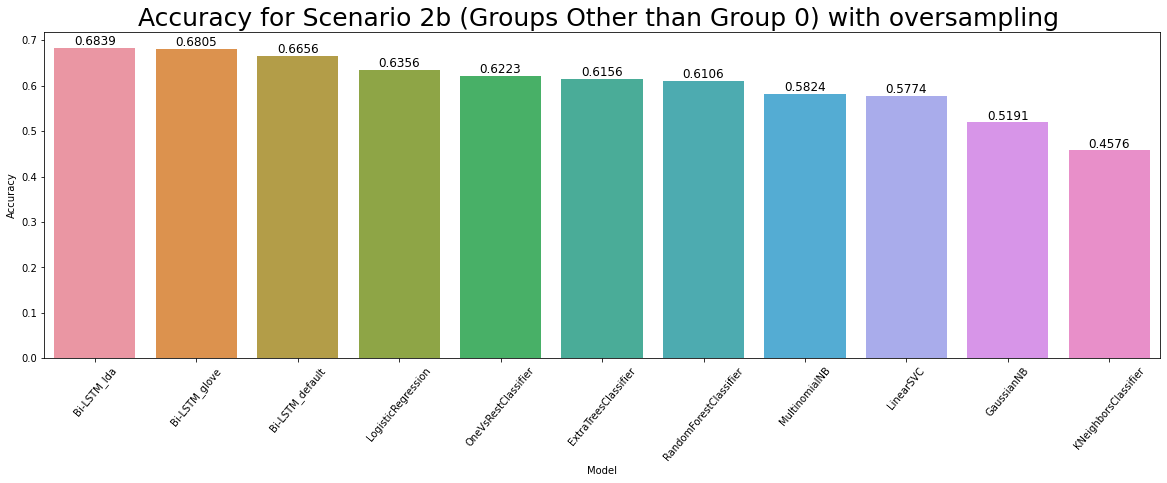

### Top 5 Models

,Model,Accuracy
9,Bi-LSTM_lda,0.683860
10,Bi-LSTM_glove,0.680532
8,Bi-LSTM_default,0.665557
0,LogisticRegression,0.635607
6,OneVsRestClassifier,0.622296


In [45]:
display_board = score_board_2b_os.sort_values(by='Accuracy',ascending=False)
plt.subplots(figsize=(20,6))
ax = sns.barplot(y='Accuracy',x='Model',data=display_board)
plt.title("Accuracy for Scenario 2b (Groups Other than Group 0) with oversampling ",fontsize=25)
rects = ax.patches
labels = display_board['Accuracy'].values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, f"{label:.4f}", ha='center', va='bottom', fontsize=12)
plt.xticks(rotation=50)
plt.show()
display(Markdown("### Top 5 Models"))
display(display_board[:5])


In [46]:
gc.collect()

156901

### Scenario (2b) with Text Augmentation


In [47]:
score_board_2b_ta = pd.DataFrame(columns=['Model','Accuracy'])
ml_model_2b_ta = [LogisticRegression(n_jobs=-1),\
              RandomForestClassifier(n_jobs=-1),\
              ExtraTreesClassifier(n_jobs=-1),\
              MultinomialNB(),GaussianNB(),\
              KNeighborsClassifier(n_jobs=-1),\
              OneVsRestClassifier(LinearSVC(loss='hinge',random_state=42),n_jobs=-1),\
              LinearSVC(loss='hinge')]

ta_list = [TFIDFAugmentor(),SynonymAugmenter(aug_src='wordnet',aug_p=0.6)]

for models in ml_model_2b_ta:
  for tas in ta_list:
    y_test,y_hat,_ = ml_model_master(df2b,_TEXT,_LABEL,_CALLER,test_model=models,cv_only=False,text_aug_obj=tas)
    accuracy_2b_ta = accuracy_score(y_test,y_hat)
    score_board_2b_ta = score_board_2b_ta.append({'Model':models.__class__.__name__+"-"+tas.__class__.__name__, 'Accuracy': accuracy_2b_ta},ignore_index=True)
    clear_output(wait=True)
    display(score_board_2b_ta)

,Model,Accuracy
0,LogisticRegression-TFIDFAugmentor,0.600666
1,LogisticRegression-SynonymAugmenter,0.667221
2,RandomForestClassifier-TFIDFAugmentor,0.587354
3,RandomForestClassifier-SynonymAugmenter,0.633943
4,ExtraTreesClassifier-TFIDFAugmentor,0.592346
5,ExtraTreesClassifier-SynonymAugmenter,0.620632
6,MultinomialNB-TFIDFAugmentor,0.570715
7,MultinomialNB-SynonymAugmenter,0.579035
8,GaussianNB-TFIDFAugmentor,0.432612
9,GaussianNB-SynonymAugmenter,0.425957


In [48]:
dl_model_2b_ta = ['default','lda','glove']
ta_list = [TFIDFAugmentor(),SynonymAugmenter(aug_src='wordnet',aug_p=0.6)]

for models in dl_model_2b_ta:
  for tas in ta_list:
    dl_loss,dl_accuracy_2b_ta = dl_model_master(df2b,_TEXT,_LABEL,_CALLER,embedding_type = models,call_back_list=['liveplot','early_stop'],text_aug_obj=tas,epochs=50)
    score_board_2b_ta = score_board_2b_ta.append({'Model':'Bi-LSTM_'+ models + "-"+tas.__class__.__name__, 'Accuracy': dl_accuracy_2b_ta},ignore_index=True)
    clear_output(wait=True)
    display(score_board_2b_ta)



,Model,Accuracy
0,LogisticRegression-TFIDFAugmentor,0.600666
1,LogisticRegression-SynonymAugmenter,0.667221
2,RandomForestClassifier-TFIDFAugmentor,0.587354
3,RandomForestClassifier-SynonymAugmenter,0.633943
4,ExtraTreesClassifier-TFIDFAugmentor,0.592346
5,ExtraTreesClassifier-SynonymAugmenter,0.620632
6,MultinomialNB-TFIDFAugmentor,0.570715
7,MultinomialNB-SynonymAugmenter,0.579035
8,GaussianNB-TFIDFAugmentor,0.432612
9,GaussianNB-SynonymAugmenter,0.425957


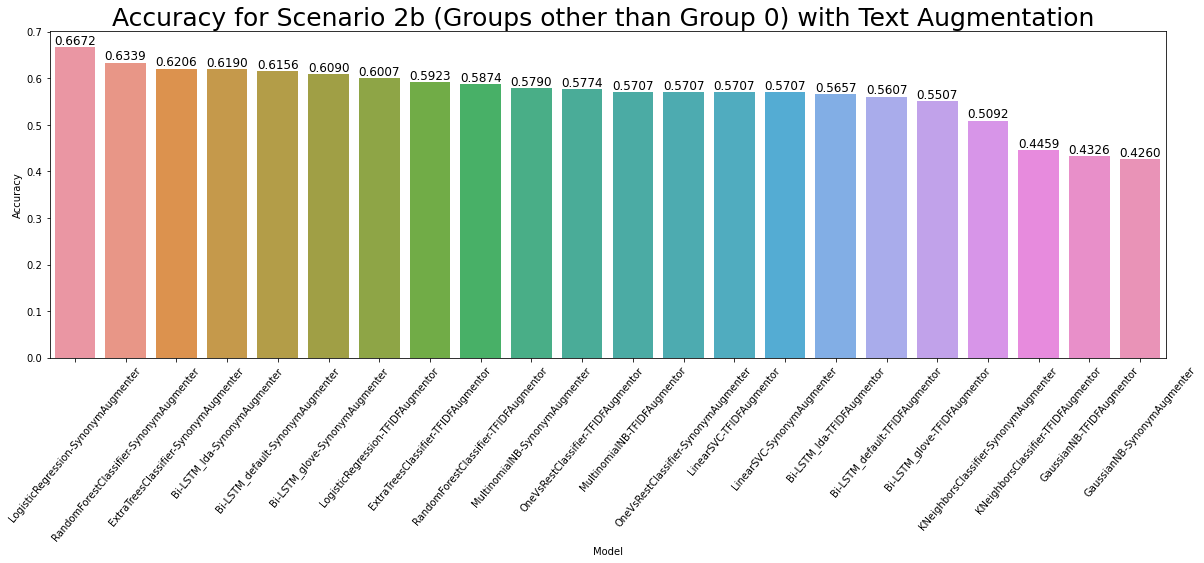

### Top 5 Models

,Model,Accuracy
1,LogisticRegression-SynonymAugmenter,0.667221
3,RandomForestClassifier-SynonymAugmenter,0.633943
5,ExtraTreesClassifier-SynonymAugmenter,0.620632
19,Bi-LSTM_lda-SynonymAugmenter,0.618968
17,Bi-LSTM_default-SynonymAugmenter,0.615641


In [49]:
display_board = score_board_2b_ta.sort_values(by='Accuracy',ascending=False)
plt.subplots(figsize=(20,6))
ax = sns.barplot(y='Accuracy',x='Model',data=display_board)
plt.title("Accuracy for Scenario 2b (Groups other than Group 0) with Text Augmentation ",fontsize=25)
rects = ax.patches
labels = display_board['Accuracy'].values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, f"{label:.4f}", ha='center', va='bottom', fontsize=12)
plt.xticks(rotation=50)
plt.show()
display(Markdown("### Top 5 Models"))
display(display_board[:5])


In [50]:
gc.collect()

69483

# Scenario 3

## Scenario 3a (L1/L2 Vs L3)

In [46]:
###### Old Config ########
# _TEXT_INPUT = 'p_desc'
# _LABEL = 'Assignment group'
# _WORD_LEN_FIELD = 'Num_Words'
# _MIN_REC_COUNT = 100
# _MAX_REC_COUNT = 5000
# _MIN_WORD_LEN = 1
# _TEXT_AUGMENT_MINORITY = False
# _EMBEDDING_SIZE = 300
# _BATCH_SIZE = 50 
# _EPOCHS=50 
# _MAX_LENGTH = 100
# _MAX_FEATURES = 10000



###### ML Models : New Config ########
# max_features = 10000
# maxlen = 100
# # df = df3a
# # _TEXT = 'p_desc'
# # _LABEL = 'Assignment group'
# # _CALLER = 'Caller'
# use_caller = True
# test_size = 0.2
# random_state = 2021
# ngram_range = (1,3)
# vectorizer = 'keras'  # 'keras','tfidf'
# # test_model=LogisticRegression(C=1.3)
# cv_only=True,
# stratify = True
# label_encoding=True,
# scaling=True,
# n_jobs=-1,
# over_sampler_obj = None    #RandomOverSampler(sampling_strategy='minority',random_state=random_state) # Only RandomSampler is supported for now.
# text_aug_obj = TFIDFAugmentor() #SynonymAugmenter(aug_src='wordnet',aug_p=0.6) 

###### DL Models : New Config ########

# max_features = 10000
# maxlen = 100
# df = df3a
# _TEXT = 'p_desc'
# _LABEL = 'Assignment level'
# _CALLER = 'Caller'
# use_caller = True
# test_size = 0.2
# random_state = 2021
# embedding_type = 'lda' # 'default', 'glove','lda',  
# embedding_size = 300
# over_sampler_obj = None#RandomOverSampler(sampling_strategy='minority',random_state=random_state) # Only RandomSampler is supported for now.
# text_aug_obj = TFIDFAugmentor() #SynonymAugmenter(aug_src='wordnet',aug_p=0.6) 
# call_back_list =['liveplot','early_stop']
# epochs = 20
# batch_size = 50
# validation_split = 0.2
# ngram_range = (1,3)
# stratify = True

###### Common Config : New Config ########

_TEXT = 'p_desc'
_LABEL = 'Assignment level'
_WORD_LEN_FIELD = 'Num_Words'
_CALLER = 'Caller'
_MIN_REC_COUNT = 100
_MAX_REC_COUNT = 10000
_MIN_WORD_LEN = 1

In [47]:
df3a = df_p[df_p[_LABEL].notna()]
df3a = df3a[df3a[_LABEL].map((df3a[_LABEL].value_counts() > _MIN_REC_COUNT) & (df3a[_LABEL].value_counts() < _MAX_REC_COUNT))]
df3a = df3a[df3a[_WORD_LEN_FIELD] > _MIN_WORD_LEN]
df3a.shape

(7897, 15)

In [48]:
df3a.isna().sum()


Short description          0
Description                0
Caller                     0
Assignment group           0
combined_description       0
lang                       0
trans_status               0
translated_text            0
post_lang                  0
p_desc                     0
Num_Words                  0
isGRP_0                    0
Pass_2_label            3422
Assignment level           0
L1L2                    3830
dtype: int64

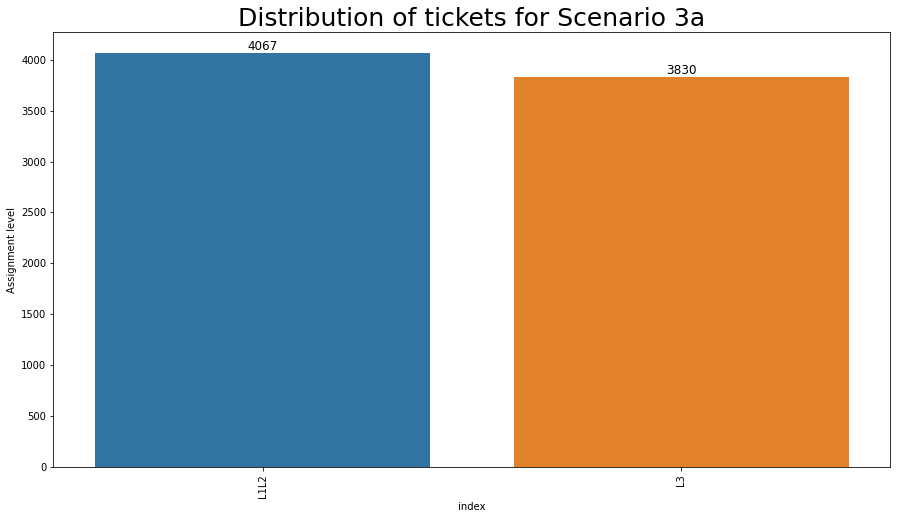

In [49]:
df_t = df3a[_LABEL].value_counts().to_frame().reset_index()

plt.subplots(figsize=(15,8))
ax = sns.barplot(y=df_t[_LABEL],x=df_t['index'])
rects = ax.patches
labels = df_t[_LABEL]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=12)
plt.title("Distribution of tickets for Scenario 3a",fontsize=25)
plt.xticks(rotation=90)
plt.show()

In [55]:
score_board_3a = pd.DataFrame(columns=['Model','Accuracy'])
ml_model_3a = [LogisticRegression(n_jobs=-1),\
              RandomForestClassifier(n_jobs=-1),\
              ExtraTreesClassifier(n_jobs=-1),\
              MultinomialNB(),GaussianNB(),\
              KNeighborsClassifier(n_jobs=-1),\
              OneVsRestClassifier(LinearSVC(loss='hinge',random_state=42),n_jobs=-1),\
              LinearSVC(loss='hinge')]
              
for models in ml_model_3a:
  y_test,y_hat,_ = ml_model_master(df3a,_TEXT,_LABEL,_CALLER,test_model=models,cv_only=False)
  accuracy_3a = accuracy_score(y_test,y_hat)
  score_board_3a = score_board_3a.append({'Model':models.__class__.__name__, 'Accuracy': accuracy_3a},ignore_index=True)
  clear_output(wait=True)
  display(score_board_3a)

,Model,Accuracy
0,LogisticRegression,0.772756
1,RandomForestClassifier,0.775939
2,ExtraTreesClassifier,0.784850
3,MultinomialNB,0.760662
4,GaussianNB,0.661999
5,KNeighborsClassifier,0.647358
6,OneVsRestClassifier,0.752387
7,LinearSVC,0.752387


In [56]:
dl_model_3a = ['default','lda','glove']
for models in dl_model_3a:
  dl_loss,dl_accuracy_3a = dl_model_master(df3a,_TEXT,_LABEL,_CALLER,embedding_type = models,call_back_list=['liveplot','early_stop'],epochs=50)
  score_board_3a = score_board_3a.append({'Model':'Bi-LSTM_'+ models, 'Accuracy': dl_accuracy_3a},ignore_index=True)
  clear_output(wait=True)
  display(score_board_3a)

,Model,Accuracy
0,LogisticRegression,0.772756
1,RandomForestClassifier,0.775939
2,ExtraTreesClassifier,0.784850
3,MultinomialNB,0.760662
4,GaussianNB,0.661999
5,KNeighborsClassifier,0.647358
6,OneVsRestClassifier,0.752387
7,LinearSVC,0.752387
8,Bi-LSTM_default,0.765118
9,Bi-LSTM_lda,0.763845


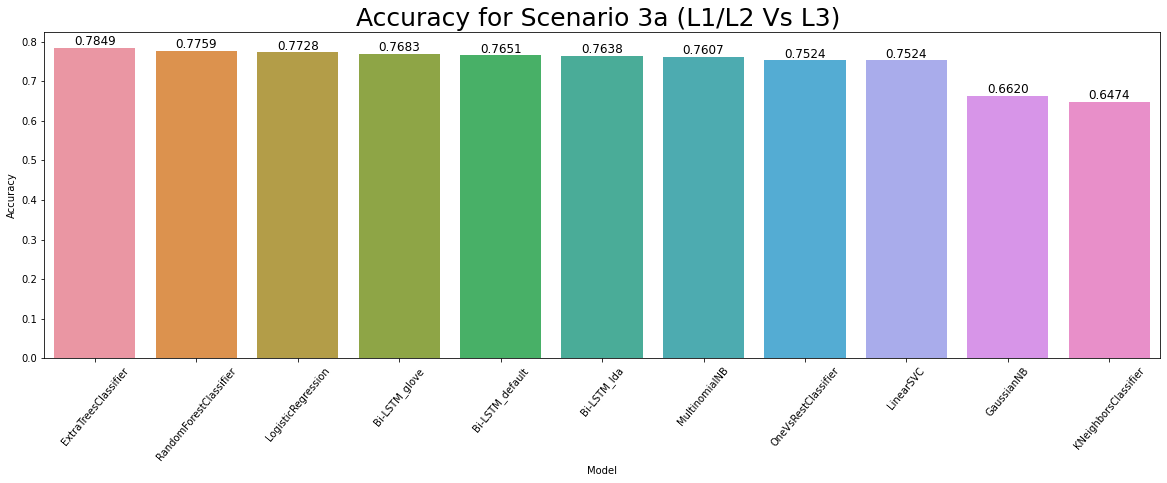

### Top 5 Models

,Model,Accuracy
2,ExtraTreesClassifier,0.784850
1,RandomForestClassifier,0.775939
0,LogisticRegression,0.772756
10,Bi-LSTM_glove,0.768300
8,Bi-LSTM_default,0.765118


In [57]:
display_board = score_board_3a.sort_values(by='Accuracy',ascending=False)
plt.subplots(figsize=(20,6))
ax = sns.barplot(y='Accuracy',x='Model',data=display_board)
plt.title("Accuracy for Scenario 3a (L1/L2 Vs L3) ",fontsize=25)
rects = ax.patches
labels = display_board['Accuracy'].values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, f"{label:.4f}", ha='center', va='bottom', fontsize=12)
plt.xticks(rotation=50)
plt.show()
display(Markdown("### Top 5 Models"))
display(display_board[:5])


In [58]:
gc.collect()

78642

## Scenario 3b (L1 Vs L2)

In [33]:
###### Old Config ########
# _TEXT_INPUT = 'p_desc'
# _LABEL = 'Assignment group'
# _WORD_LEN_FIELD = 'Num_Words'
# _MIN_REC_COUNT = 100
# _MAX_REC_COUNT = 5000
# _MIN_WORD_LEN = 1
# _TEXT_AUGMENT_MINORITY = False
# _EMBEDDING_SIZE = 300
# _BATCH_SIZE = 50 
# _EPOCHS=50 
# _MAX_LENGTH = 100
# _MAX_FEATURES = 10000



###### ML Models : New Config ########
# max_features = 10000
# maxlen = 100
# # df = df3a
# # _TEXT = 'p_desc'
# # _LABEL = 'Assignment group'
# # _CALLER = 'Caller'
# use_caller = True
# test_size = 0.2
# random_state = 2021
# ngram_range = (1,3)
# vectorizer = 'keras'  # 'keras','tfidf'
# # test_model=LogisticRegression(C=1.3)
# cv_only=True,
# stratify = True
# label_encoding=True,
# scaling=True,
# n_jobs=-1,
# over_sampler_obj = None    #RandomOverSampler(sampling_strategy='minority',random_state=random_state) # Only RandomSampler is supported for now.
# text_aug_obj = TFIDFAugmentor() #SynonymAugmenter(aug_src='wordnet',aug_p=0.6) 

###### DL Models : New Config ########

# max_features = 10000
# maxlen = 100
# df = df3a
# _TEXT = 'p_desc'
# _LABEL = 'Assignment level'
# _CALLER = 'Caller'
# use_caller = True
# test_size = 0.2
# random_state = 2021
# embedding_type = 'lda' # 'default', 'glove','lda',  
# embedding_size = 300
# over_sampler_obj = None#RandomOverSampler(sampling_strategy='minority',random_state=random_state) # Only RandomSampler is supported for now.
# text_aug_obj = TFIDFAugmentor() #SynonymAugmenter(aug_src='wordnet',aug_p=0.6) 
# call_back_list =['liveplot','early_stop']
# epochs = 20
# batch_size = 50
# validation_split = 0.2
# ngram_range = (1,3)
# stratify = True

###### Common Config : New Config ########

_TEXT = 'p_desc'
_LABEL = 'L1L2'
_WORD_LEN_FIELD = 'Num_Words'
_CALLER = 'Caller'
_MIN_REC_COUNT = 100
_MAX_REC_COUNT = 5000
_MIN_WORD_LEN = 1

In [36]:
df3b = df_p[df_p[_LABEL].notna()]
df3b = df3b[df3b[_LABEL].map((df3b[_LABEL].value_counts() > _MIN_REC_COUNT) & (df3b[_LABEL].value_counts() < _MAX_REC_COUNT))]
df3b = df3b[df3b[_WORD_LEN_FIELD] > _MIN_WORD_LEN]
df3b.shape

(4051, 15)

In [37]:
df3b.isna().sum()


Short description          0
Description                0
Caller                     0
Assignment group           0
combined_description       0
lang                       0
trans_status               0
translated_text            0
post_lang                  0
p_desc                     0
Num_Words                  0
isGRP_0                    0
Pass_2_label            3407
Assignment level           0
L1L2                       0
dtype: int64

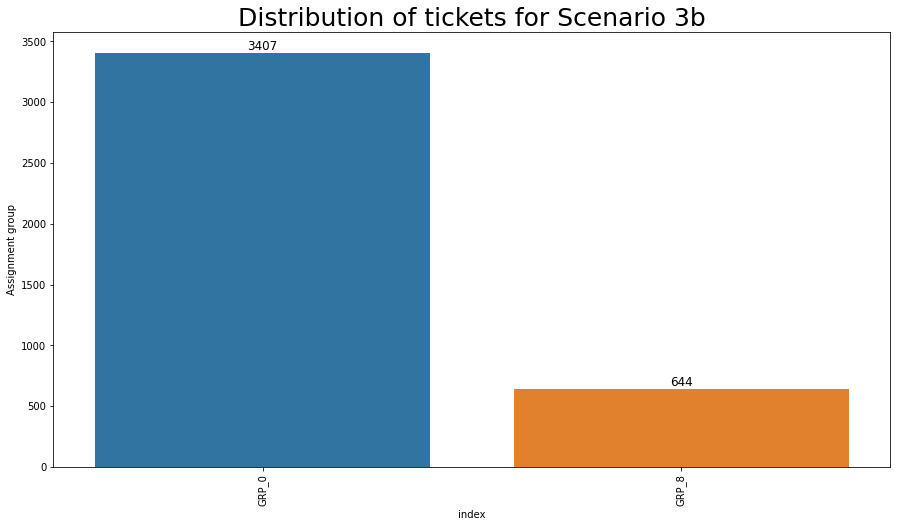

In [44]:
df_t = df3b[_LABEL].value_counts().to_frame().reset_index()

plt.subplots(figsize=(15,8))
ax = sns.barplot(y=df_t[_LABEL],x=df_t['index'])
rects = ax.patches
labels = df_t[_LABEL]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=12)
plt.title("Distribution of tickets for Scenario 3b",fontsize=25)
plt.xticks(rotation=90)
plt.show()

In [63]:
score_board_3b = pd.DataFrame(columns=['Model','Accuracy'])
ml_model_3b = [LogisticRegression(n_jobs=-1),\
              RandomForestClassifier(n_jobs=-1),\
              ExtraTreesClassifier(n_jobs=-1),\
              MultinomialNB(),GaussianNB(),\
              KNeighborsClassifier(n_jobs=-1),\
              OneVsRestClassifier(LinearSVC(loss='hinge',random_state=42),n_jobs=-1),\
              LinearSVC(loss='hinge')]

for models in ml_model_3b:
  y_test,y_hat,_ = ml_model_master(df3b,_TEXT,_LABEL,_CALLER,test_model=models,cv_only=False)
  accuracy_3b = accuracy_score(y_test,y_hat)
  score_board_3b = score_board_3b.append({'Model':models.__class__.__name__, 'Accuracy': accuracy_3b},ignore_index=True)
  clear_output(wait=True)
  display(score_board_3b)

,Model,Accuracy
0,LogisticRegression,0.995068
1,RandomForestClassifier,0.997534
2,ExtraTreesClassifier,0.997534
3,MultinomialNB,0.995068
4,GaussianNB,0.981504
5,KNeighborsClassifier,0.996301
6,OneVsRestClassifier,0.997534
7,LinearSVC,0.997534


In [64]:
dl_model_3b = ['default','lda','glove']
for models in dl_model_3b:
  dl_loss,dl_accuracy_3b = dl_model_master(df3b,_TEXT,_LABEL,_CALLER,embedding_type = models,call_back_list=['liveplot','early_stop'],epochs=50)
  score_board_3b = score_board_3b.append({'Model':'Bi-LSTM_'+ models, 'Accuracy': dl_accuracy_3b},ignore_index=True)
  clear_output(wait=True)
  display(score_board_3b)


,Model,Accuracy
0,LogisticRegression,0.995068
1,RandomForestClassifier,0.997534
2,ExtraTreesClassifier,0.997534
3,MultinomialNB,0.995068
4,GaussianNB,0.981504
5,KNeighborsClassifier,0.996301
6,OneVsRestClassifier,0.997534
7,LinearSVC,0.997534
8,Bi-LSTM_default,0.996301
9,Bi-LSTM_lda,0.160296


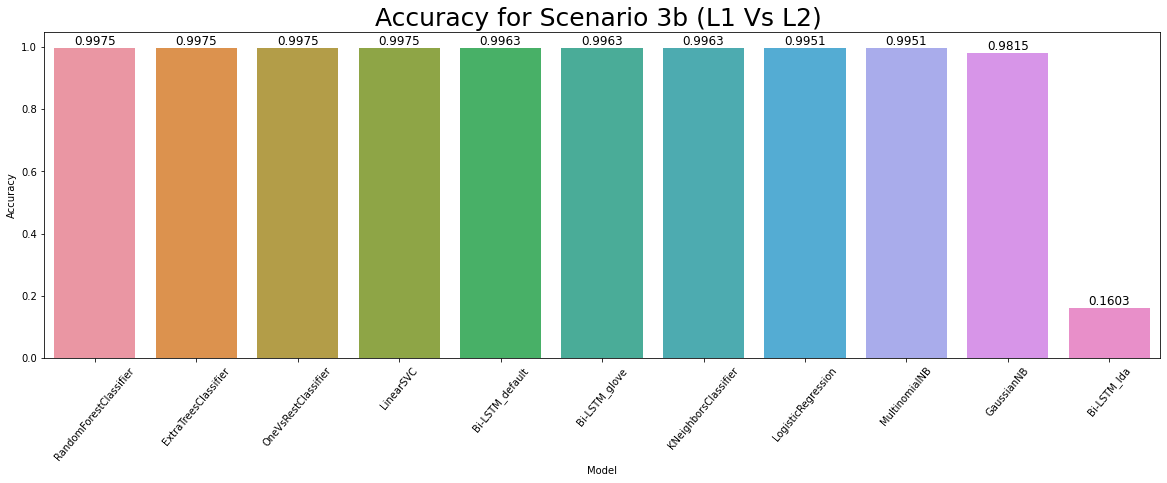

### Top 5 Models

,Model,Accuracy
1,RandomForestClassifier,0.997534
2,ExtraTreesClassifier,0.997534
6,OneVsRestClassifier,0.997534
7,LinearSVC,0.997534
8,Bi-LSTM_default,0.996301


In [65]:
display_board = score_board_3b.sort_values(by='Accuracy',ascending=False)
plt.subplots(figsize=(20,6))
ax = sns.barplot(y='Accuracy',x='Model',data=display_board)
plt.title("Accuracy for Scenario 3b (L1 Vs L2) ",fontsize=25)
rects = ax.patches
labels = display_board['Accuracy'].values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, f"{label:.4f}", ha='center', va='bottom', fontsize=12)
plt.xticks(rotation=50)
plt.show()
display(Markdown("### Top 5 Models"))
display(display_board[:5])

In [66]:
gc.collect()

109173

## Scenario 3c (L3 groups) without OverSampling

In [50]:
###### Old Config ########
# _TEXT_INPUT = 'p_desc'
# _LABEL = 'Assignment group'
# _WORD_LEN_FIELD = 'Num_Words'
# _MIN_REC_COUNT = 100
# _MAX_REC_COUNT = 5000
# _MIN_WORD_LEN = 1
# _TEXT_AUGMENT_MINORITY = False
# _EMBEDDING_SIZE = 300
# _BATCH_SIZE = 50 
# _EPOCHS=50 
# _MAX_LENGTH = 100
# _MAX_FEATURES = 10000



###### ML Models : New Config ########
# max_features = 10000
# maxlen = 100
# # df = df3a
# # _TEXT = 'p_desc'
# # _LABEL = 'Assignment group'
# # _CALLER = 'Caller'
# use_caller = True
# test_size = 0.2
# random_state = 2021
# ngram_range = (1,3)
# vectorizer = 'keras'  # 'keras','tfidf'
# # test_model=LogisticRegression(C=1.3)
# cv_only=True,
# stratify = True
# label_encoding=True,
# scaling=True,
# n_jobs=-1,
# over_sampler_obj = None    #RandomOverSampler(sampling_strategy='minority',random_state=random_state) # Only RandomSampler is supported for now.
# text_aug_obj = TFIDFAugmentor() #SynonymAugmenter(aug_src='wordnet',aug_p=0.6) 

###### DL Models : New Config ########

# max_features = 10000
# maxlen = 100
# df = df3a
# _TEXT = 'p_desc'
# _LABEL = 'Assignment level'
# _CALLER = 'Caller'
# use_caller = True
# test_size = 0.2
# random_state = 2021
# embedding_type = 'lda' # 'default', 'glove','lda',  
# embedding_size = 300
# over_sampler_obj = None#RandomOverSampler(sampling_strategy='minority',random_state=random_state) # Only RandomSampler is supported for now.
# text_aug_obj = TFIDFAugmentor() #SynonymAugmenter(aug_src='wordnet',aug_p=0.6) 
# call_back_list =['liveplot','early_stop']
# epochs = 20
# batch_size = 50
# validation_split = 0.2
# ngram_range = (1,3)
# stratify = True

###### Common Config : New Config ########

_TEXT = 'p_desc'
_LABEL = 'Assignment group'
_WORD_LEN_FIELD = 'Num_Words'
_CALLER = 'Caller'
_MIN_REC_COUNT = 100
_MAX_REC_COUNT = 400
_MIN_WORD_LEN = 2


In [51]:
df3c = df_p[df_p[_LABEL].notna()]
df3c = df3c[df3c[_LABEL].map((df3c[_LABEL].value_counts() > _MIN_REC_COUNT) & (df3c[_LABEL].value_counts() < _MAX_REC_COUNT))]
df3c = df3c[df3c[_WORD_LEN_FIELD] > _MIN_WORD_LEN]
df3c.shape

(2360, 15)

In [52]:
df3c.isna().sum()

Short description          0
Description                0
Caller                     0
Assignment group           0
combined_description       0
lang                       0
trans_status               0
translated_text            0
post_lang                  0
p_desc                     0
Num_Words                  0
isGRP_0                    0
Pass_2_label               0
Assignment level           0
L1L2                    2360
dtype: int64

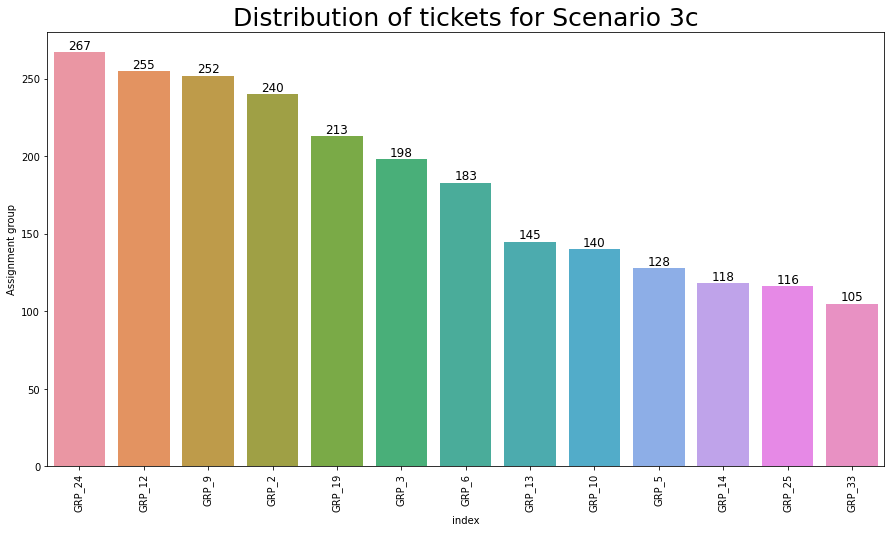

In [53]:
# plt.subplots(figsize=(15,8))
# ax = sns.countplot(x=df3c[_LABEL])
# rects = ax.patches
# labels = df3c[_LABEL].value_counts()
# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=12)
# plt.title("Distribution of tickets",fontsize=25)
# plt.xticks(rotation=90)
# plt.show()

df_t = df3c[_LABEL].value_counts().to_frame().reset_index()

plt.subplots(figsize=(15,8))
ax = sns.barplot(y=df_t[_LABEL],x=df_t['index'])
rects = ax.patches
labels = df_t[_LABEL]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=12)
plt.title("Distribution of tickets for Scenario 3c",fontsize=25)
plt.xticks(rotation=90)
plt.show()

In [71]:
score_board_3c = pd.DataFrame(columns=['Model','Accuracy'])
ml_model_3c = [LogisticRegression(n_jobs=-1),\
              RandomForestClassifier(n_jobs=-1),\
              ExtraTreesClassifier(n_jobs=-1),\
              MultinomialNB(),GaussianNB(),\
              KNeighborsClassifier(n_jobs=-1),\
              OneVsRestClassifier(LinearSVC(loss='hinge',random_state=42),n_jobs=-1),\
              LinearSVC(loss='hinge')]

for models in ml_model_3c:
  y_test,y_hat,_ = ml_model_master(df3c,_TEXT,_LABEL,_CALLER,test_model=models,cv_only=False)
  accuracy_3c = accuracy_score(y_test,y_hat)
  score_board_3c = score_board_3c.append({'Model':models.__class__.__name__, 'Accuracy': accuracy_3c},ignore_index=True)
  clear_output(wait=True)
  display(score_board_3c)


,Model,Accuracy
0,LogisticRegression,0.707627
1,RandomForestClassifier,0.671610
2,ExtraTreesClassifier,0.694915
3,MultinomialNB,0.697034
4,GaussianNB,0.540254
5,KNeighborsClassifier,0.485169
6,OneVsRestClassifier,0.699153
7,LinearSVC,0.699153


In [72]:
dl_model_3c = ['default','lda','glove']
for models in dl_model_3c:
  dl_loss,dl_accuracy_3c = dl_model_master(df3c,_TEXT,_LABEL,_CALLER,embedding_type = models,call_back_list=['liveplot','early_stop'],epochs=50)
  score_board_3c = score_board_3c.append({'Model':'Bi-LSTM_'+ models, 'Accuracy': dl_accuracy_3c},ignore_index=True)
  clear_output(wait=True)
  display(score_board_3c)

,Model,Accuracy
0,LogisticRegression,0.707627
1,RandomForestClassifier,0.671610
2,ExtraTreesClassifier,0.694915
3,MultinomialNB,0.697034
4,GaussianNB,0.540254
5,KNeighborsClassifier,0.485169
6,OneVsRestClassifier,0.699153
7,LinearSVC,0.699153
8,Bi-LSTM_default,0.699153
9,Bi-LSTM_lda,0.694915


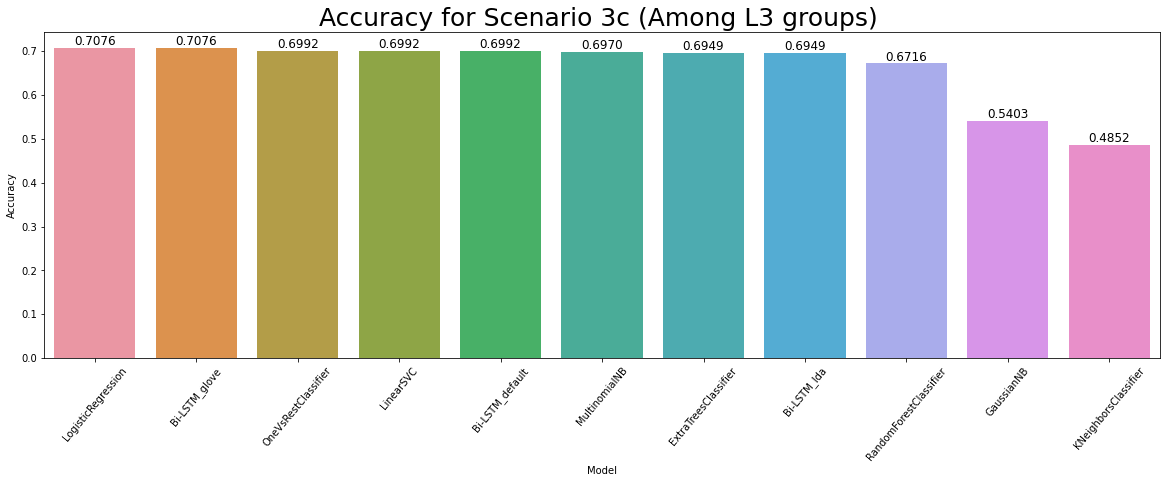

### Top 5 Models

,Model,Accuracy
0,LogisticRegression,0.707627
10,Bi-LSTM_glove,0.707627
6,OneVsRestClassifier,0.699153
7,LinearSVC,0.699153
8,Bi-LSTM_default,0.699153


In [73]:
display_board = score_board_3c.sort_values(by='Accuracy',ascending=False)
plt.subplots(figsize=(20,6))
ax = sns.barplot(y='Accuracy',x='Model',data=display_board)
plt.title("Accuracy for Scenario 3c (Among L3 groups) ",fontsize=25)
rects = ax.patches
labels = display_board['Accuracy'].values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, f"{label:.4f}", ha='center', va='bottom', fontsize=12)
plt.xticks(rotation=50)
plt.show()
display(Markdown("### Top 5 Models"))
display(display_board[:5])


In [74]:
gc.collect()

68533

### Scenario 3c (L3 Groups) with **Oversampling**

In [75]:
score_board_3c_os = pd.DataFrame(columns=['Model','Accuracy'])
ml_model_3c_os = [LogisticRegression(n_jobs=-1),\
              RandomForestClassifier(n_jobs=-1),\
              ExtraTreesClassifier(n_jobs=-1),\
              MultinomialNB(),GaussianNB(),\
              KNeighborsClassifier(n_jobs=-1),\
              OneVsRestClassifier(LinearSVC(loss='hinge',random_state=42),n_jobs=-1),\
              LinearSVC(loss='hinge')]

ros = RandomOverSampler(sampling_strategy='not majority',random_state=random_state)

for models in ml_model_3c_os:
  y_test,y_hat,_ = ml_model_master(df3c,_TEXT,_LABEL,_CALLER,test_model=models,cv_only=False,over_sampler_obj=ros)
  accuracy_3c_os = accuracy_score(y_test,y_hat)
  score_board_3c_os = score_board_3c_os.append({'Model':models.__class__.__name__, 'Accuracy': accuracy_3c_os},ignore_index=True)
  clear_output(wait=True)
  display(score_board_3c_os)

,Model,Accuracy
0,LogisticRegression,0.694915
1,RandomForestClassifier,0.661017
2,ExtraTreesClassifier,0.684322
3,MultinomialNB,0.618644
4,GaussianNB,0.542373
5,KNeighborsClassifier,0.519068
6,OneVsRestClassifier,0.627119
7,LinearSVC,0.631356


In [76]:

dl_model_3c_os = ['default','lda','glove']

ros = RandomOverSampler(sampling_strategy='not majority',random_state=random_state)

for models in dl_model_3c_os:
  dl_loss,dl_accuracy_3c_os = dl_model_master(df3c,_TEXT,_LABEL,_CALLER,embedding_type = models,call_back_list=['liveplot','early_stop'],epochs=50,over_sampler_obj=ros)
  score_board_3c_os = score_board_3c_os.append({'Model':'Bi-LSTM_'+ models, 'Accuracy': dl_accuracy_3c_os},ignore_index=True)
  clear_output(wait=True)
  display(score_board_3c_os)

,Model,Accuracy
0,LogisticRegression,0.694915
1,RandomForestClassifier,0.661017
2,ExtraTreesClassifier,0.684322
3,MultinomialNB,0.618644
4,GaussianNB,0.542373
5,KNeighborsClassifier,0.519068
6,OneVsRestClassifier,0.627119
7,LinearSVC,0.631356
8,Bi-LSTM_default,0.699153
9,Bi-LSTM_lda,0.735169


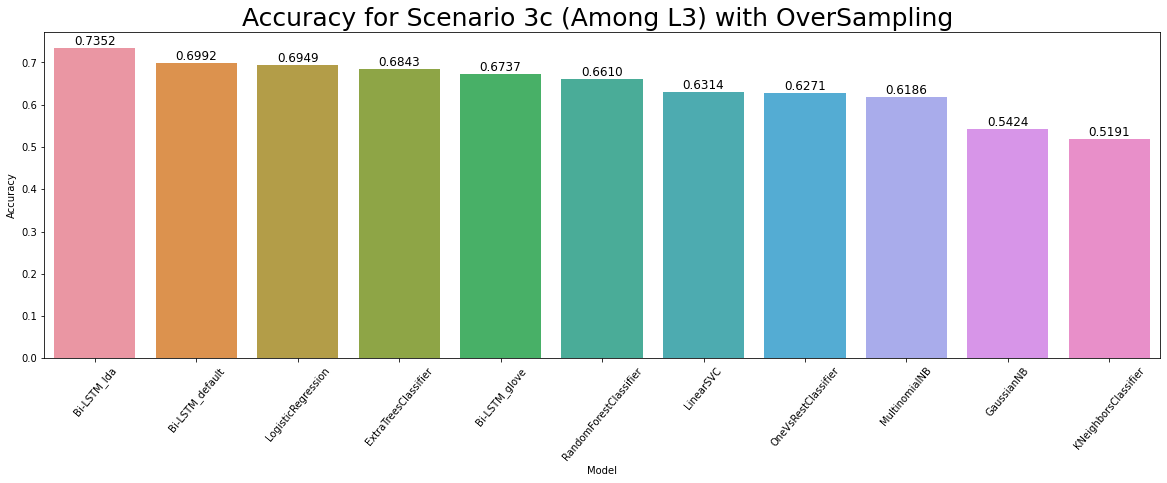

### Top 5 Models

,Model,Accuracy
9,Bi-LSTM_lda,0.735169
8,Bi-LSTM_default,0.699153
0,LogisticRegression,0.694915
2,ExtraTreesClassifier,0.684322
10,Bi-LSTM_glove,0.673729


In [86]:
display_board = score_board_3c_os.sort_values(by='Accuracy',ascending=False)
plt.subplots(figsize=(20,6))
ax = sns.barplot(y='Accuracy',x='Model',data=display_board)
plt.title("Accuracy for Scenario 3c (Among L3) with OverSampling ",fontsize=25)
rects = ax.patches
labels = display_board['Accuracy'].values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, f"{label:.4f}", ha='center', va='bottom', fontsize=12)
plt.xticks(rotation=50)
plt.show()
display(Markdown("### Top 5 Models"))
display(display_board[:5])


### Scenario 3c (L3 Groups) with **Text Augmentation**



In [78]:
score_board_3c_ta = pd.DataFrame(columns=['Model','Accuracy'])
ml_model_3c_ta = [LogisticRegression(n_jobs=-1),\
              RandomForestClassifier(n_jobs=-1),\
              ExtraTreesClassifier(n_jobs=-1),\
              MultinomialNB(),GaussianNB(),\
              KNeighborsClassifier(n_jobs=-1),\
              OneVsRestClassifier(LinearSVC(loss='hinge',random_state=42),n_jobs=-1),\
              LinearSVC(loss='hinge')]

ta_list = [TFIDFAugmentor(),SynonymAugmenter(aug_src='wordnet',aug_p=0.6)]

for models in ml_model_3c_ta:
  for tas in ta_list:
    y_test,y_hat,_ = ml_model_master(df3c,_TEXT,_LABEL,_CALLER,test_model=models,text_aug_obj=tas,cv_only=False)
    accuracy_3c_ta = accuracy_score(y_test,y_hat)
    score_board_3c_ta = score_board_3c_ta.append({'Model':models.__class__.__name__+"-"+tas.__class__.__name__, 'Accuracy': accuracy_3c_ta},ignore_index=True)
    clear_output(wait=True)
    display(score_board_3c_ta)


,Model,Accuracy
0,LogisticRegression-TFIDFAugmentor,0.665254
1,LogisticRegression-SynonymAugmenter,0.675847
2,RandomForestClassifier-TFIDFAugmentor,0.661017
3,RandomForestClassifier-SynonymAugmenter,0.663136
4,ExtraTreesClassifier-TFIDFAugmentor,0.639831
5,ExtraTreesClassifier-SynonymAugmenter,0.673729
6,MultinomialNB-TFIDFAugmentor,0.620763
7,MultinomialNB-SynonymAugmenter,0.627119
8,GaussianNB-TFIDFAugmentor,0.463983
9,GaussianNB-SynonymAugmenter,0.504237


In [79]:
dl_model_3c_ta = ['default','lda','glove']
ta_list = [TFIDFAugmentor(),SynonymAugmenter(aug_src='wordnet',aug_p=0.6)]

for models in dl_model_3c_ta:
  for tas in ta_list:
    dl_loss,dl_accuracy_3c_ta = dl_model_master(df3c,_TEXT,_LABEL,_CALLER,embedding_type = models,call_back_list=['liveplot','early_stop'],epochs=50,text_aug_obj=tas)
    score_board_3c_ta = score_board_3c_ta.append({'Model':'Bi-LSTM_'+ models + "-"+tas.__class__.__name__, 'Accuracy': dl_accuracy_3c_ta},ignore_index=True)
    clear_output(wait=True)
    display(score_board_3c_ta)

,Model,Accuracy
0,LogisticRegression-TFIDFAugmentor,0.665254
1,LogisticRegression-SynonymAugmenter,0.675847
2,RandomForestClassifier-TFIDFAugmentor,0.661017
3,RandomForestClassifier-SynonymAugmenter,0.663136
4,ExtraTreesClassifier-TFIDFAugmentor,0.639831
5,ExtraTreesClassifier-SynonymAugmenter,0.673729
6,MultinomialNB-TFIDFAugmentor,0.620763
7,MultinomialNB-SynonymAugmenter,0.627119
8,GaussianNB-TFIDFAugmentor,0.463983
9,GaussianNB-SynonymAugmenter,0.504237


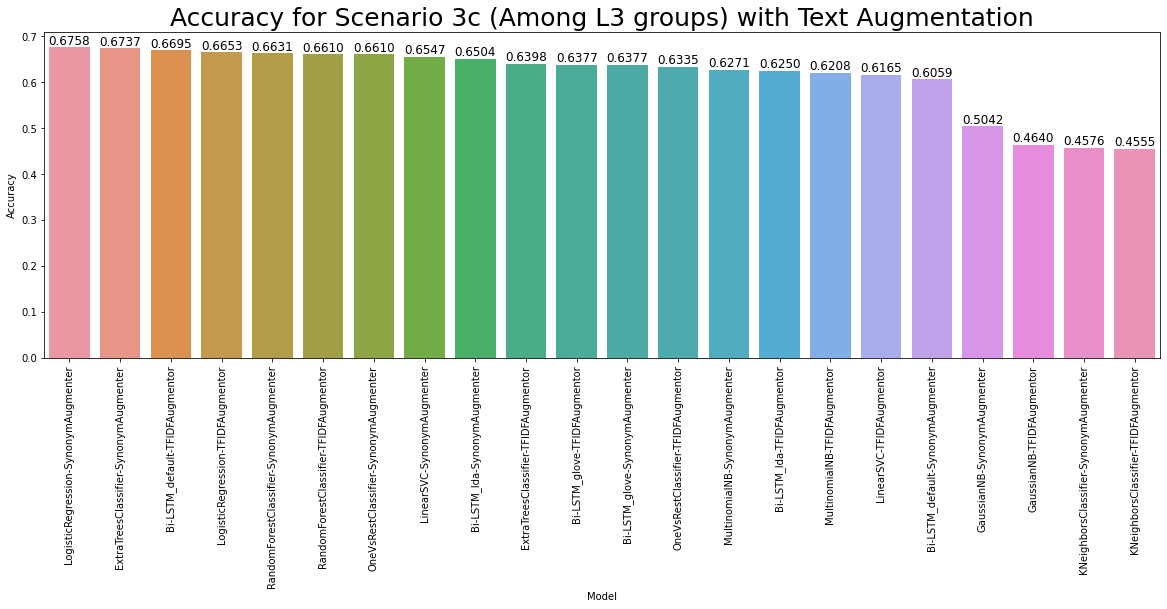

### Top 5 Models

,Model,Accuracy
1,LogisticRegression-SynonymAugmenter,0.675847
5,ExtraTreesClassifier-SynonymAugmenter,0.673729
16,Bi-LSTM_default-TFIDFAugmentor,0.669492
0,LogisticRegression-TFIDFAugmentor,0.665254
3,RandomForestClassifier-SynonymAugmenter,0.663136


In [85]:
display_board = score_board_3c_ta.sort_values(by='Accuracy',ascending=False)
plt.subplots(figsize=(20,6))
ax = sns.barplot(y='Accuracy',x='Model',data=display_board)
plt.title("Accuracy for Scenario 3c (Among L3 groups) with Text Augmentation",fontsize=25)
rects = ax.patches
labels = display_board['Accuracy'].values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, f"{label:.4f}", ha='center', va='bottom', fontsize=12)
plt.xticks(rotation=90)
plt.show()
display(Markdown("### Top 5 Models"))
display(display_board[:5])

In [81]:
gc.collect()

190071

#(8) Conclusion
1. We could see that scenario 3 drives better accuracy when comapred to the rest of the scenario.
2. Interestingly the ML models are performing better than the DL models.